# Evaluating DeepCDR adaptations

## 1. DeepCDR (cell embedding: baseline, scGPT, scFoundation)


In [83]:
import numpy as np
import pandas as pd


deepCDR_baseline_1 = np.load('../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_run_1.npz')
deepCDR_baseline_2 = np.load('../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_run_2.npz')
deepCDR_baseline_3 = np.load('../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_run_3.npz')

deepCDR_scF_1 = np.load('../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_1.npz')
deepCDR_scF_2 = np.load('../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_2.npz')
deepCDR_scF_3 = np.load('../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_3.npz')

deepCDR_scGPT_1 = np.load('../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_1.npz')
deepCDR_scGPT_2 = np.load('../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_2.npz')
deepCDR_scGPT_3 = np.load('../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_3.npz')

#with omics
deepCDR_baseline_1_with = np.load('../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_run_1.npz')
deepCDR_baseline_2_with = np.load('../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_run_2.npz')
deepCDR_baseline_3_with = np.load('../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_run_3.npz')

deepCDR_scF_1_with = np.load('../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_1.npz')
deepCDR_scF_2_with = np.load('../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_2.npz')
deepCDR_scF_3_with = np.load('../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_3.npz')

deepCDR_scGPT_1_with = np.load('../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_1.npz')
deepCDR_scGPT_2_with = np.load('../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_2.npz')
deepCDR_scGPT_3_with = np.load('../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_3.npz')


def loadToDataframe(npzdata):
    df = pd.DataFrame([npzdata[key] for key in npzdata.keys()]).T
    df.columns = [key for key in npzdata.keys()]
    return df

def aggRunDataFrame(baseline_npz,scF_npz,scGPT_npz):
    base = loadToDataframe(baseline_npz)
    base.rename(columns = {"pred":"baseline_ic50", "test" : "true_ic50"}, inplace=True)
    base["scFoundation_ic50"] = scF_npz["pred"]
    base["scGPT_ic50"] = scGPT_npz["pred"]
    return base

TRUE_COL_NAME = "true_ic50"
BASELINE_COL_NAME = "baseline_ic50"
SCF_COL_NAME = "scFoundation_ic50"
SCGPT_COL_NAME = "scGPT_ic50"

aggRunDataFrame(deepCDR_baseline_2,deepCDR_scF_2, deepCDR_scGPT_2)


cancer_type    cellline pubchem_id baseline_ic50 true_ic50  \
0            ALL  ACH-000061     176870      2.688226  3.880844   
1            ALL  ACH-000795    6710780     -3.399251  -4.87648   
2            ALL  ACH-000937    6710780     -3.399251 -3.523262   
3            ALL  ACH-000937      84691       3.06402  3.398056   
4            ALL  ACH-000104       6253      0.681133  0.065377   
...          ...         ...        ...           ...       ...   
4724   COAD/READ  ACH-000009   20635522      2.908246  4.062888   
4725   COAD/READ  ACH-000943   20635522      2.908246  1.351481   
4726   COAD/READ  ACH-000009       4993      3.525847  5.723911   
4727   COAD/READ  ACH-000009   49836027     -1.694165 -1.228476   
4728   COAD/READ  ACH-000403    9826308     -2.520433  -2.78753   

      scFoundation_ic50  scGPT_ic50  
0              2.641295    2.649984  
1             -5.308724   -4.805253  
2             -5.377109   -4.083684  
3              2.227236    2.978312  
4             -0.893136   -0.458176  
...                 ...         ...  
4724           2.664116    3.211496  
4725           2.592933    2.062712  
4726           3.254140    4.089547  
4727          -2.016359   -1.422210  
4728          -2.540159   -3.266644  

[4729 rows x 7 columns]

## Global Correlation (Aggregated across 3 runs)

In [84]:
from scipy.stats import pearsonr,spearmanr
def eval_run(run_data):
    #run_data = aggRunDataFrame(baseline,scF, scGPT)
    baseline_pcc,_ = pearsonr(run_data[BASELINE_COL_NAME], run_data[TRUE_COL_NAME])
    baseline_spearman,_ = spearmanr(run_data[BASELINE_COL_NAME], run_data[TRUE_COL_NAME])
    scF_pcc,_ = pearsonr(run_data[SCF_COL_NAME], run_data[TRUE_COL_NAME])
    scF_spearman,_ = spearmanr(run_data[SCF_COL_NAME], run_data[TRUE_COL_NAME])
    scGPT_pcc,_ = pearsonr(run_data[SCGPT_COL_NAME], run_data[TRUE_COL_NAME])
    scGPT_spearman,_ = spearmanr(run_data[SCGPT_COL_NAME], run_data[TRUE_COL_NAME])
    
    result = {
                "baseline": {
                    "pcc": baseline_pcc, 
                    "spearman": baseline_spearman
                    }, 
                "scfoundation": {
                    "pcc":scF_pcc, 
                    "spearman" : scF_spearman
                    }, 
                "scGPT": {
                    "pcc":scGPT_pcc, 
                    "spearman": scGPT_spearman
                        }
            }
    print(result)
    return result

def eval_runs(run_data_list):
    eval_data = []
    for run_data in run_data_list:
        eval_data.append(eval_run(run_data))
    return aggRunResults(eval_data)

def aggRunResults(run_results: list[dict]):
    aggregated_result = {}
    for key in run_results[0].keys():
        aggregated_result[key] = {}
        measures = run_results[0][key].keys()
        for measure in measures:
            agg_measure = np.mean(np.array([result[key][measure] for result in run_results]))
            aggregated_result[key][measure] = agg_measure

    return aggregated_result

run_data_1 = aggRunDataFrame(deepCDR_baseline_1, deepCDR_scF_1, deepCDR_scGPT_1)
run_data_2 = aggRunDataFrame(deepCDR_baseline_2, deepCDR_scF_2, deepCDR_scGPT_2)
run_data_3 = aggRunDataFrame(deepCDR_baseline_3, deepCDR_scF_3, deepCDR_scGPT_3)
runs = [run_data_1,run_data_2,run_data_3]

#with omics
with_omics_run_1 = aggRunDataFrame(deepCDR_baseline_1_with, deepCDR_scF_1_with, deepCDR_scGPT_1_with)
with_omics_run_2 = aggRunDataFrame(deepCDR_baseline_2_with, deepCDR_scF_2_with, deepCDR_scGPT_2_with)
with_omics_run_3 = aggRunDataFrame(deepCDR_baseline_3_with, deepCDR_scF_3_with, deepCDR_scGPT_3_with)
runs_with_omics = [with_omics_run_1, with_omics_run_2, with_omics_run_3]

eval_data_without = eval_runs(runs)
eval_data_with = eval_runs(runs_with_omics)


{'baseline': {'pcc': 0.8397442335015423, 'spearman': 0.7909578334774141}, 'scfoundation': {'pcc': 0.8807847553040306, 'spearman': 0.8466666287464243}, 'scGPT': {'pcc': 0.9151664760651226, 'spearman': 0.8872146054150022}}
{'baseline': {'pcc': 0.8373899189317658, 'spearman': 0.7976765064629636}, 'scfoundation': {'pcc': 0.877514061112564, 'spearman': 0.8525873400832461}, 'scGPT': {'pcc': 0.9102385819476709, 'spearman': 0.8830615448191027}}
{'baseline': {'pcc': 0.8453888182994858, 'spearman': 0.8032999164372633}, 'scfoundation': {'pcc': 0.8883253669184064, 'spearman': 0.8625561014365238}, 'scGPT': {'pcc': 0.9158593134181126, 'spearman': 0.8931758282468014}}
{'baseline': {'pcc': 0.9193051296468624, 'spearman': 0.8934635485873478}, 'scfoundation': {'pcc': 0.9162921472738483, 'spearman': 0.8893993970148375}, 'scGPT': {'pcc': 0.9202202242593508, 'spearman': 0.8928972970153313}}
{'baseline': {'pcc': 0.9183695912469376, 'spearman': 0.8929442823805822}, 'scfoundation': {'pcc': 0.9186529932918712,

In [85]:
import colorbm as cbm
import seaborn as sns
sns.set_palette(sns.color_palette(cbm.pal('npg').as_hex))
import matplotlib.pyplot as plt

In [86]:
run_data = aggRunDataFrame(deepCDR_baseline_3, deepCDR_scF_3, deepCDR_scGPT_3)
allcancer = run_data.cancer_type.unique().tolist()
alldrug = run_data.pubchem_id.unique().tolist()
allcellline = run_data.cellline.unique().tolist()
print(len(allcancer),len(alldrug), len(allcellline))

24 223 493


In [87]:
def plotCellLineForRun(run_data, eval_data, title=None):
    rest_cellline = []
    for can in allcellline:
        selectmeta = run_data[run_data.cellline==can].copy()
        if selectmeta.shape[0]<2:
            continue
        scGPTpear = pearsonr(selectmeta[SCGPT_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        scGPTspear = spearmanr(selectmeta[SCGPT_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        basepear = pearsonr(selectmeta[BASELINE_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        basespear = spearmanr(selectmeta[BASELINE_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        scfpear = pearsonr(selectmeta[SCF_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        scfspear = spearmanr(selectmeta[SCF_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        rest_cellline.append([can,scGPTpear,scGPTspear,basepear,basespear,scGPTpear-basepear,scGPTspear-basespear, scfpear])
    rest_cellline = pd.DataFrame(rest_cellline,columns=['Name','scGPT_P','scGPT_S','Base_P','Base_S','Diff_P','Diff_S', 'SCF_P'])

    fig, axes = plt.subplots(1, 3, figsize=(8, 3))  # 1 row, 2 columns
    fig.suptitle(title)
    # SCGPT vs SCF
    sns.scatterplot(data=rest_cellline, x='SCF_P', y='scGPT_P', color='green', ax=axes[0])
    sns.lineplot(x=[0,1], y=[0,1], linestyle='--', ax=axes[0])
    axes[0].set_title('All Cellline Pearson')
    axes[0].set_xlabel('scFoundation')
    axes[0].set_ylabel('scGPT')
    axes[0].set_xlim(0.25, 1)
    axes[0].set_ylim(0.25, 1)
    fig.text(0.5, -0.02, f'Overall PCCs: Baseline: {eval_data["baseline"]["pcc"]:.3f}, scGPT: {eval_data["scGPT"]["pcc"]:.3f}, scFoundation: {eval_data["scfoundation"]["pcc"]:.3f}', ha='center')

    # SCGPT vs Base
    sns.scatterplot(data=rest_cellline, x='Base_P', y='scGPT_P', color='blue', ax=axes[1])
    sns.lineplot(x=[0,1], y=[0,1], linestyle='--', ax=axes[1])
    axes[1].set_title('All Cellline Pearson')
    axes[1].set_xlabel('Baseline')
    axes[1].set_ylabel('scGPT')
    axes[1].set_xlim(0.25, 1)
    axes[1].set_ylim(0.25, 1)

    # SCF vs. Base
    sns.scatterplot(data=rest_cellline, x='Base_P', y='SCF_P', color='black', ax=axes[2])
    sns.lineplot(x=[0,1], y=[0,1], linestyle='--', ax=axes[2])
    axes[2].set_title('All Cellline Pearson')
    axes[2].set_xlabel('Baseline')
    axes[2].set_ylabel('scFoundation')
    axes[2].set_xlim(0.25, 1)
    axes[2].set_ylim(0.25, 1)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

In [88]:
def plotCancerForRun(run_data, eval_data, title=None):
    rest_cancer = []
    for can in allcancer:
        selectmeta = run_data[run_data.cancer_type==can].copy()
        if selectmeta.shape[0]<2:
            continue
        scGPTpear = pearsonr(selectmeta[SCGPT_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        scGPTspear = spearmanr(selectmeta[SCGPT_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        basepear = pearsonr(selectmeta[BASELINE_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        basespear = spearmanr(selectmeta[BASELINE_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        scfpear = pearsonr(selectmeta[SCF_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        scfspear = spearmanr(selectmeta[SCF_COL_NAME].values,selectmeta[TRUE_COL_NAME].values)[0]
        rest_cancer.append([can,scGPTpear,scGPTspear,basepear,basespear,scGPTpear-basepear,scGPTspear-basespear, scfpear])
    rest_cancer = pd.DataFrame(rest_cancer,columns=['Name','scGPT_P','scGPT_S','Base_P','Base_S','Diff_P','Diff_S', 'SCF_P'])

    fig, axes = plt.subplots(1, 3, figsize=(8, 3))  # 1 row, 2 columns
    fig.suptitle(title)
    # SCGPT vs SCF
    sns.scatterplot(data=rest_cancer, x='SCF_P', y='scGPT_P', color='green', ax=axes[0])
    sns.lineplot(x=[0,1], y=[0,1], linestyle='--', ax=axes[0])
    axes[0].set_title('All Cellline Pearson')
    axes[0].set_xlabel('scFoundation')
    axes[0].set_ylabel('scGPT')
    axes[0].set_xlim(0.25, 1)
    axes[0].set_ylim(0.25, 1)
    fig.text(0.5, -0.02, f'Overall PCCs: Baseline: {eval_data["baseline"]["pcc"]:.3f}, scGPT: {eval_data["scGPT"]["pcc"]:.3f}, scFoundation: {eval_data["scfoundation"]["pcc"]:.3f}', ha='center')

    # SCGPT vs Base
    sns.scatterplot(data=rest_cancer, x='Base_P', y='scGPT_P', color='blue', ax=axes[1])
    sns.lineplot(x=[0,1], y=[0,1], linestyle='--', ax=axes[1])
    axes[1].set_title('All Cellline Pearson')
    axes[1].set_xlabel('Baseline')
    axes[1].set_ylabel('scGPT')
    axes[1].set_xlim(0.25, 1)
    axes[1].set_ylim(0.25, 1)

    # SCF vs. Base
    sns.scatterplot(data=rest_cancer, x='Base_P', y='SCF_P', color='black', ax=axes[2])
    sns.lineplot(x=[0,1], y=[0,1], linestyle='--', ax=axes[2])
    axes[2].set_title('All Cellline Pearson')
    axes[2].set_xlabel('Baseline')
    axes[2].set_ylabel('scFoundation')
    axes[2].set_xlim(0.25, 1)
    axes[2].set_ylim(0.25, 1)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

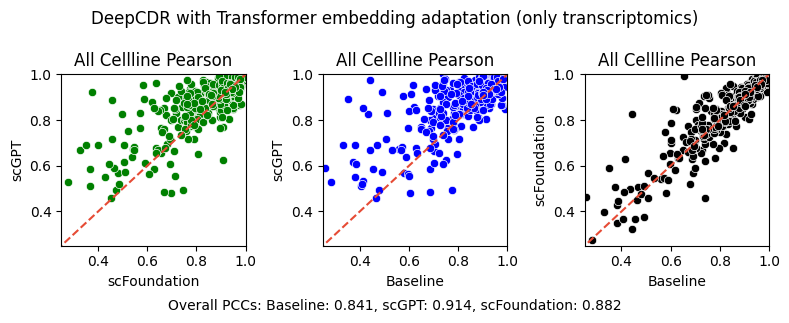

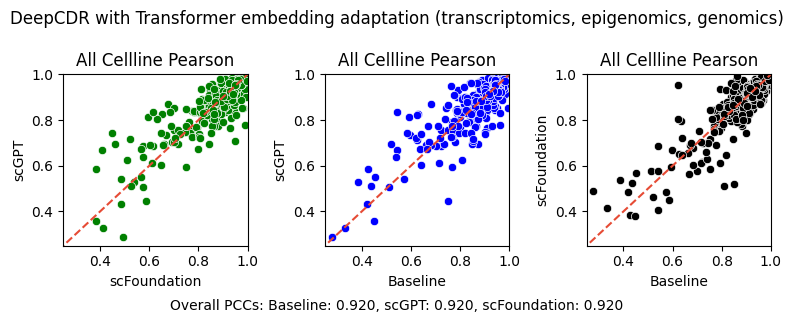

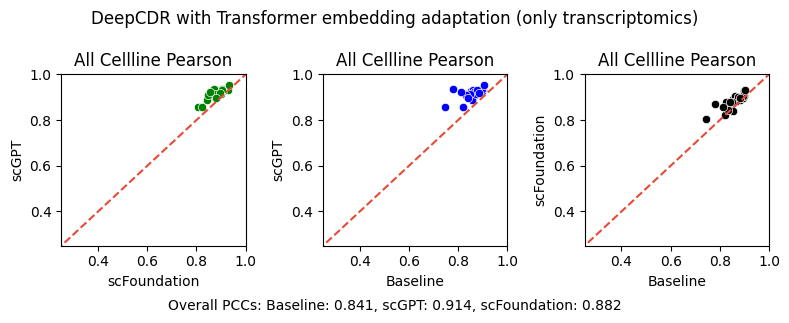

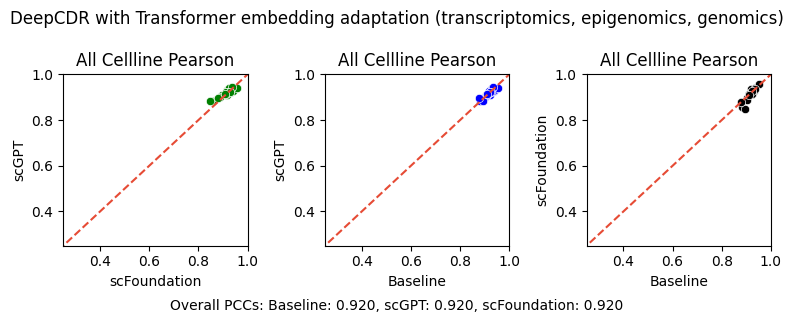

In [89]:
plotCellLineForRun(run_data_1, eval_data_without, "DeepCDR with Transformer embedding adaptation (only transcriptomics)")
plotCellLineForRun(with_omics_run_1, eval_data_with, "DeepCDR with Transformer embedding adaptation (transcriptomics, epigenomics, genomics)")
plotCancerForRun(run_data_1, eval_data_without, "DeepCDR with Transformer embedding adaptation (only transcriptomics)")
plotCancerForRun(with_omics_run_1, eval_data_with, "DeepCDR with Transformer embedding adaptation (transcriptomics, epigenomics, genomics)")


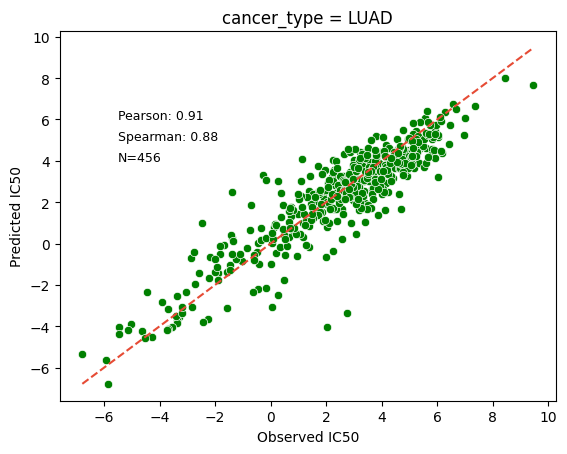

In [90]:
def plot_sliced_data(data, column, category, filter):
    can = filter
    selectmeta = data[data[category]==can].copy()
    sns.lineplot(x=[selectmeta[TRUE_COL_NAME].min(),selectmeta[TRUE_COL_NAME].max()],y=[selectmeta[TRUE_COL_NAME].min(),selectmeta[TRUE_COL_NAME].max()],linestyle='--')
    sns.scatterplot(data=selectmeta,x=TRUE_COL_NAME,y=SCGPT_COL_NAME,color='green')
    plt.title(f"{category} = {filter}")
    plt.xlabel('Observed IC50')
    plt.ylabel('Predicted IC50')

    pcc = pearsonr(selectmeta[TRUE_COL_NAME],selectmeta[column])[0]
    spe = spearmanr(selectmeta[TRUE_COL_NAME],selectmeta[column])[0]

    plt.text(-5.5,6,f'Pearson: {pcc:.2f}',fontsize=9)
    plt.text(-5.5,5,f'Spearman: {spe:.2f}',fontsize=9)
    plt.text(-5.5,4,f'N={selectmeta.shape[0]}',fontsize=9)

    plt.grid(False)
    
plot_sliced_data(run_data_1, SCGPT_COL_NAME, "cancer_type", "LUAD")
# calc pcc scores for all cancer types


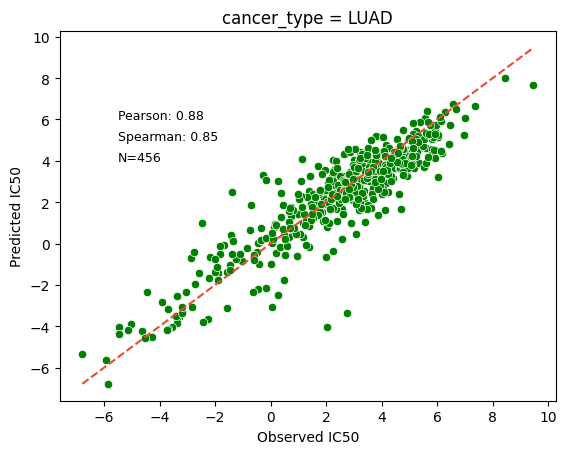

In [91]:
plot_sliced_data(run_data_1, SCF_COL_NAME, "cancer_type", "LUAD")

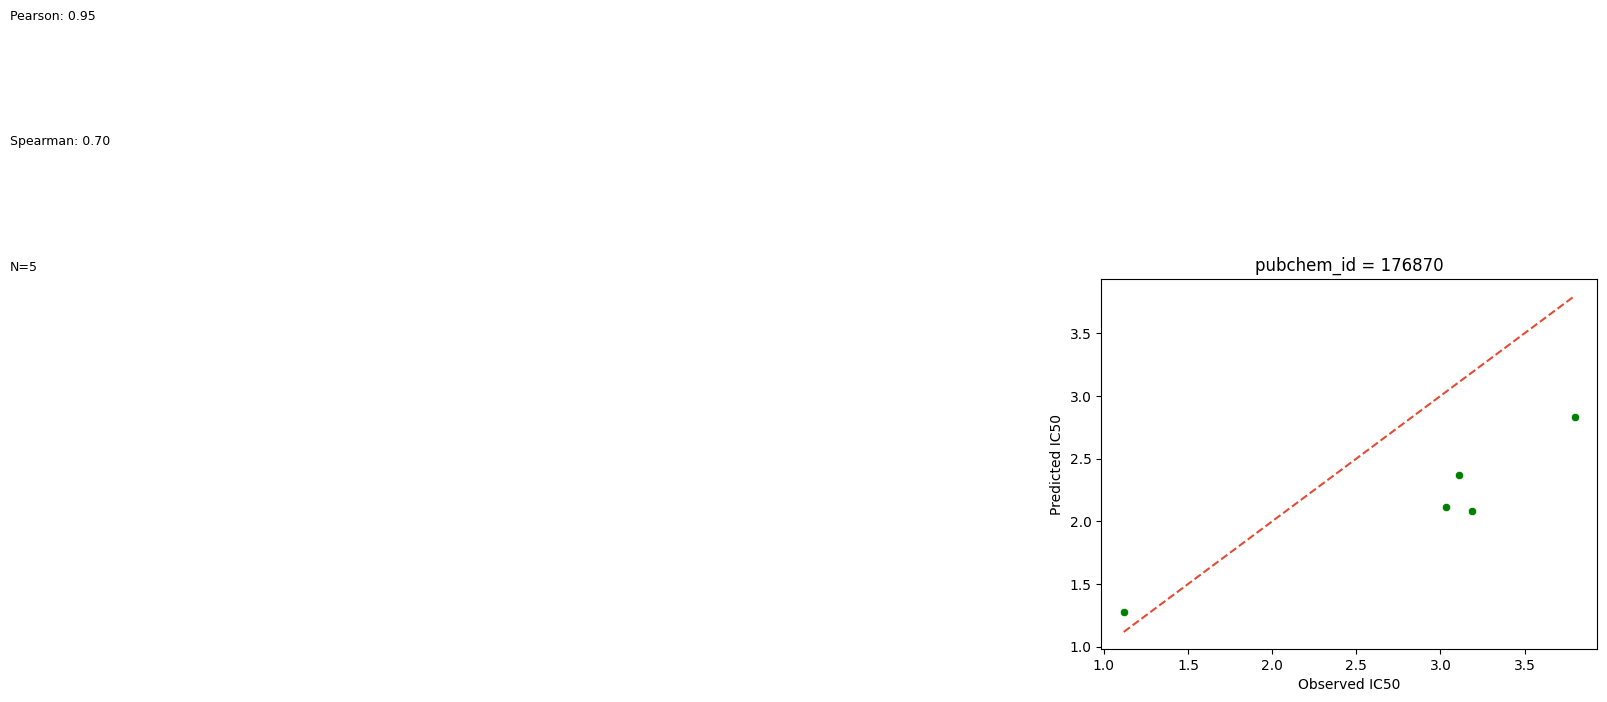

In [92]:
plot_sliced_data(run_data_1, SCGPT_COL_NAME, "pubchem_id", "176870")

## 2. DeepCDR + chemberta as drug embedding (cell embedding: baseline, scGPT, scFoundation)

In [93]:
#load chemberta
deepCDR_chemberta_baseline_1 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_chemberta_run_1.npz")
deepCDR_chemberta_baseline_2 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_chemberta_run_2.npz")
deepCDR_chemberta_baseline_3 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_chemberta_run_3.npz")

deepCDR_chemberta_scGPT_1 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scGPT_embeddings_run_1.npz")
deepCDR_chemberta_scGPT_2 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scGPT_embeddings_run_2.npz")
deepCDR_chemberta_scGPT_3 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scGPT_embeddings_run_3.npz")

deepCDR_chemberta_scF_1 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scFound_embeddings_run_1.npz")
deepCDR_chemberta_scF_2 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scFound_embeddings_run_2.npz")
deepCDR_chemberta_scF_3 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scFound_embeddings_run_3.npz")

chemberta_run_data_1 = aggRunDataFrame(deepCDR_chemberta_baseline_1, deepCDR_chemberta_scF_1, deepCDR_chemberta_scGPT_1)
chemberta_run_data_2 = aggRunDataFrame(deepCDR_chemberta_baseline_2, deepCDR_chemberta_scF_2, deepCDR_chemberta_scGPT_2)
chemberta_run_data_3 = aggRunDataFrame(deepCDR_chemberta_baseline_3, deepCDR_chemberta_scF_3, deepCDR_chemberta_scGPT_3)
chemberta_runs = [chemberta_run_data_1,chemberta_run_data_2,chemberta_run_data_3]

chemberta_eval_data = eval_runs(chemberta_runs)


{'baseline': {'pcc': 0.8233044428817716, 'spearman': 0.7672627308296378}, 'scfoundation': {'pcc': 0.8633034127379511, 'spearman': 0.8249847099265868}, 'scGPT': {'pcc': 0.8839722099434284, 'spearman': 0.8537017640430745}}
{'baseline': {'pcc': 0.8188782098109862, 'spearman': 0.7826079120620741}, 'scfoundation': {'pcc': 0.849349520793978, 'spearman': 0.8165751906344048}, 'scGPT': {'pcc': 0.8655915263674173, 'spearman': 0.836876195949177}}
{'baseline': {'pcc': 0.8214919636094692, 'spearman': 0.7861717516980583}, 'scfoundation': {'pcc': 0.8615212771496802, 'spearman': 0.84417758454235}, 'scGPT': {'pcc': 0.8788476099313894, 'spearman': 0.853386824108931}}


# With Omics

In [94]:
# with omics
deepCDR_chemberta_baseline_1_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_chemberta_run_1.npz")
deepCDR_chemberta_baseline_2_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_chemberta_run_2.npz")
deepCDR_chemberta_baseline_3_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_chemberta_run_3.npz")

deepCDR_chemberta_scGPT_1_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scGPT_embeddings_run_1.npz")
deepCDR_chemberta_scGPT_2_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scGPT_embeddings_run_2.npz")
deepCDR_chemberta_scGPT_3_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scGPT_embeddings_run_3.npz")

deepCDR_chemberta_scF_1_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scFound_embeddings_run_1.npz")
deepCDR_chemberta_scF_2_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scFound_embeddings_run_2.npz")
deepCDR_chemberta_scF_3_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scFound_embeddings_run_3.npz")

chemberta_run_data_1_with = aggRunDataFrame(deepCDR_chemberta_baseline_1_with, deepCDR_chemberta_scF_1_with, deepCDR_chemberta_scGPT_1_with)
chemberta_run_data_2_with = aggRunDataFrame(deepCDR_chemberta_baseline_2_with, deepCDR_chemberta_scF_2_with, deepCDR_chemberta_scGPT_2_with)
chemberta_run_data_3_with = aggRunDataFrame(deepCDR_chemberta_baseline_3_with, deepCDR_chemberta_scF_3_with, deepCDR_chemberta_scGPT_3_with)
chemberta_runs_with = [chemberta_run_data_1_with,chemberta_run_data_2_with,chemberta_run_data_3_with]

chmberta_eval_data_with = eval_runs(chemberta_runs_with)

{'baseline': {'pcc': 0.880333810490907, 'spearman': 0.8521127162413829}, 'scfoundation': {'pcc': 0.8830228751154799, 'spearman': 0.8512346835946054}, 'scGPT': {'pcc': 0.8716879141564328, 'spearman': 0.837692430798018}}
{'baseline': {'pcc': 0.8789799047594735, 'spearman': 0.8538717213914643}, 'scfoundation': {'pcc': 0.866663136645792, 'spearman': 0.84203378957572}, 'scGPT': {'pcc': 0.8857962454114868, 'spearman': 0.8593024576598395}}
{'baseline': {'pcc': 0.8743289366504974, 'spearman': 0.8526901442141414}, 'scfoundation': {'pcc': 0.8827887952748005, 'spearman': 0.8616410837313772}, 'scGPT': {'pcc': 0.8846183867636326, 'spearman': 0.8562332204944633}}


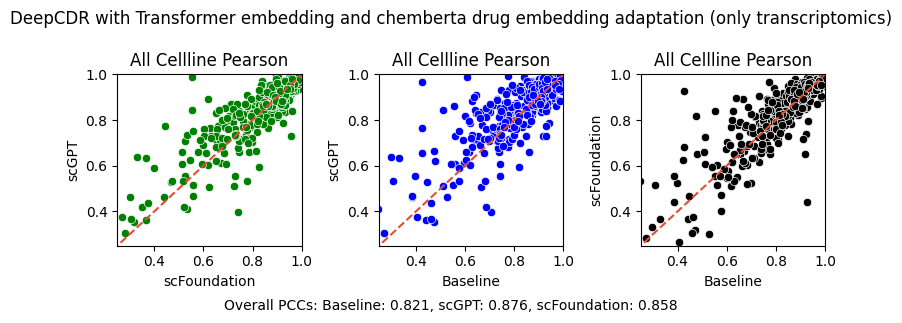

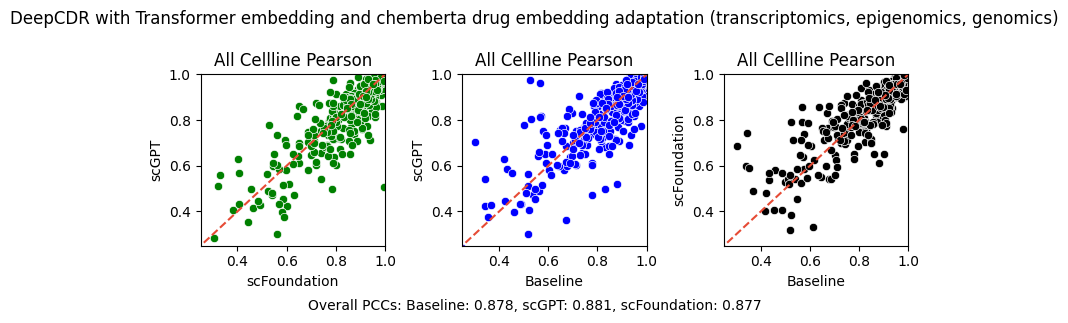

In [95]:
plotCellLineForRun(chemberta_run_data_1, chemberta_eval_data, "DeepCDR with Transformer embedding and chemberta drug embedding adaptation (only transcriptomics)")
plotCellLineForRun(chemberta_run_data_1_with, chmberta_eval_data_with, "DeepCDR with Transformer embedding and chemberta drug embedding adaptation (transcriptomics, epigenomics, genomics)")


# Molformer

In [96]:
deepCDR_molformer_baseline_1 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_1.npz")
deepCDR_molformer_baseline_2 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_2.npz")
deepCDR_molformer_baseline_3 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_3.npz")

deepCDR_molformer_scGPT_1 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_1.npz")
deepCDR_molformer_scGPT_2 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_2.npz")
deepCDR_molformer_scGPT_3 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_3.npz")

deepCDR_molformer_scF_1 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_1.npz")
deepCDR_molformer_scF_2 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_2.npz")
deepCDR_molformer_scF_3 = np.load("../data/eval/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_3.npz")

molformer_run_data_1 = aggRunDataFrame(deepCDR_molformer_baseline_1, deepCDR_molformer_scF_1, deepCDR_molformer_scGPT_1)
molformer_run_data_2 = aggRunDataFrame(deepCDR_molformer_baseline_2, deepCDR_molformer_scF_2, deepCDR_molformer_scGPT_2)
molformer_run_data_3 = aggRunDataFrame(deepCDR_molformer_baseline_3, deepCDR_molformer_scF_3, deepCDR_molformer_scGPT_3)
molformer_runs = [molformer_run_data_1,molformer_run_data_2,molformer_run_data_3]

molformer_eval_data = eval_runs(molformer_runs)


{'baseline': {'pcc': 0.8597752780411523, 'spearman': 0.8176145019527202}, 'scfoundation': {'pcc': 0.8847154923424373, 'spearman': 0.8528812972124082}, 'scGPT': {'pcc': 0.9092553856107014, 'spearman': 0.8792497021752528}}
{'baseline': {'pcc': 0.8381342971610304, 'spearman': 0.7988613168388496}, 'scfoundation': {'pcc': 0.8797533619245375, 'spearman': 0.8521248350084051}, 'scGPT': {'pcc': 0.9140223836337729, 'spearman': 0.8885443462103865}}
{'baseline': {'pcc': 0.8455429706161713, 'spearman': 0.8037446997253491}, 'scfoundation': {'pcc': 0.8878498934324769, 'spearman': 0.8631520360619478}, 'scGPT': {'pcc': 0.9128102049166344, 'spearman': 0.8887617362355001}}


In [97]:
# with omics
deepCDR_molformer_baseline_1_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_1.npz")
deepCDR_molformer_baseline_2_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_2.npz")
deepCDR_molformer_baseline_3_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_3.npz")

deepCDR_molformer_scGPT_1_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_1.npz")
deepCDR_molformer_scGPT_2_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_2.npz")
deepCDR_molformer_scGPT_3_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_3.npz")

deepCDR_molformer_scF_1_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_1.npz")
deepCDR_molformer_scF_2_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_2.npz")
deepCDR_molformer_scF_3_with = np.load("../data/eval/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_3.npz")

molformer_run_data_1_with = aggRunDataFrame(deepCDR_molformer_baseline_1_with, deepCDR_molformer_scF_1_with, deepCDR_molformer_scGPT_1_with)
molformer_run_data_2_with = aggRunDataFrame(deepCDR_molformer_baseline_2_with, deepCDR_molformer_scF_2_with, deepCDR_molformer_scGPT_2_with)
molformer_run_data_3_with = aggRunDataFrame(deepCDR_molformer_baseline_3_with, deepCDR_molformer_scF_3_with, deepCDR_molformer_scGPT_3_with)
molformer_runs_with = [molformer_run_data_1_with,molformer_run_data_2_with,molformer_run_data_3_with]

molformer_eval_data_with = eval_runs(molformer_runs_with)

{'baseline': {'pcc': 0.9166804483568771, 'spearman': 0.8879457196077736}, 'scfoundation': {'pcc': 0.9176216444197903, 'spearman': 0.8926565224183721}, 'scGPT': {'pcc': 0.9174297445027783, 'spearman': 0.8921747955842548}}
{'baseline': {'pcc': 0.9184778994289088, 'spearman': 0.89297191676959}, 'scfoundation': {'pcc': 0.917789291694012, 'spearman': 0.891140933478467}, 'scGPT': {'pcc': 0.9170092589935269, 'spearman': 0.8931286298931795}}
{'baseline': {'pcc': 0.9226038781331893, 'spearman': 0.9015123418197406}, 'scfoundation': {'pcc': 0.9208916781834969, 'spearman': 0.9003430919568408}, 'scGPT': {'pcc': 0.9229796723907108, 'spearman': 0.9009890850240811}}


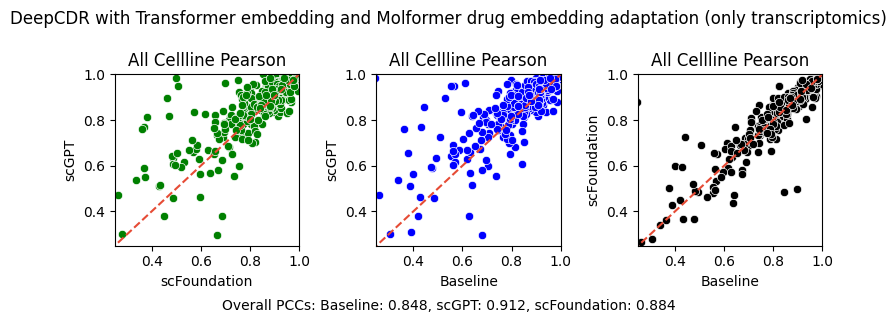

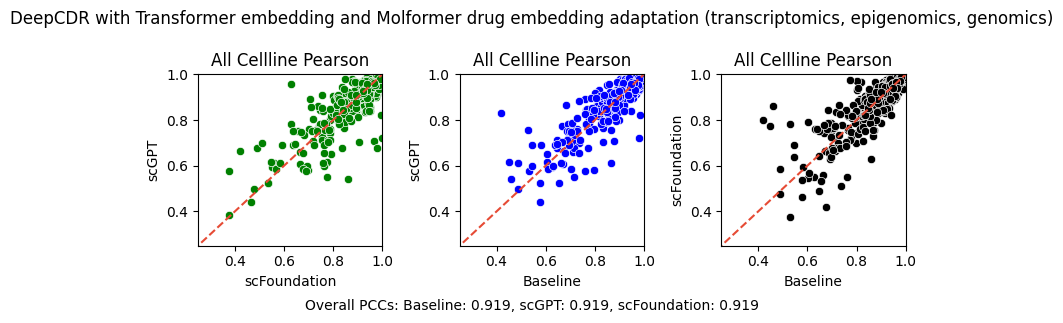

In [98]:
plotCellLineForRun(molformer_run_data_1, molformer_eval_data, "DeepCDR with Transformer embedding and Molformer drug embedding adaptation (only transcriptomics)")
plotCellLineForRun(molformer_run_data_1_with, molformer_eval_data_with, "DeepCDR with Transformer embedding and Molformer drug embedding adaptation (transcriptomics, epigenomics, genomics)")


# Calc top candidates over different Categories (chemberta)

In [99]:
from scipy.stats import pearsonr
import pandas as pd
from pandas import DataFrame
print(loadToDataframe(deepCDR_chemberta_scGPT_1))

# Function to calculate PCC
def calculate_pcc(df, group_col):
    df = loadToDataframe(df)
    pcc_values = {}
    
    for group in df[group_col].unique():
        subset = df[df[group_col] == group]
        if len(subset) > 1:  # Ensure enough data points for correlation
            pcc_values[group] = pearsonr(subset["test"], subset["pred"])[0]
    
    return pcc_values

# Compute PCC for each unique pubchem_id, cancer_type, and cell_line
pcc_pubchem = calculate_pcc(deepCDR_chemberta_scGPT_1, "pubchem_id")
pcc_cancer_type = calculate_pcc(deepCDR_chemberta_scGPT_1, "cancer_type")
pcc_cell_line = calculate_pcc(deepCDR_chemberta_scGPT_1, "cellline")

# Convert to DataFrames and sort
pcc_pubchem_df = pd.DataFrame(pcc_pubchem.items(), columns=["pubchem_id", "pcc"]).dropna()
pcc_cancer_df = pd.DataFrame(pcc_cancer_type.items(), columns=["cancer_type", "pcc"]).dropna()
pcc_cell_df = pd.DataFrame(pcc_cell_line.items(), columns=["cell_line", "pcc"]).dropna()

# Get top 10 highest PCC values
top_10_pubchem = pcc_pubchem_df.sort_values(by="pcc", ascending=False).head(10)
top_10_cancer = pcc_cancer_df.sort_values(by="pcc", ascending=False).head(10)
top_10_cell = pcc_cell_df.sort_values(by="pcc", ascending=False).head(10)

print("Top 10 PubChem ID PCC values:")
print(top_10_pubchem)

print("\nTop 10 Cancer Type PCC values:")
print(top_10_cancer)

print("\nTop 10 Cell Line PCC values:")
print(top_10_cell)


     cancer_type    cellline pubchem_id      pred      test
0            ALL  ACH-000937      65110  7.189456  7.705618
1            ALL  ACH-000070    6710780 -4.943468 -5.620091
2            ALL  ACH-000981    6710780 -4.444101 -3.846894
3            ALL  ACH-000104    6710780 -4.389038 -4.810259
4            ALL  ACH-000795    6710780 -4.717585  -4.87648
...          ...         ...        ...       ...       ...
4724   COAD/READ  ACH-000943   20635522    2.9359  1.351481
4725   COAD/READ  ACH-000403       4993  3.029892  4.725866
4726   COAD/READ  ACH-000722       4261  1.450783  2.080257
4727   COAD/READ  ACH-000943    7251185  2.570269  1.205209
4728   COAD/READ  ACH-000403   11626927   3.80162  4.187384

[4729 rows x 5 columns]
Top 10 PubChem ID PCC values:
    pubchem_id       pcc
217    7251185  1.000000
167     176870  0.975830
209    5329102  0.967437
121   16760646  0.941557
6       644241  0.910967
124   49821040  0.894318
213   24951314  0.877041
90    53394750  0.864514


# Leave One Drug Out

In [100]:
import os
from collections import defaultdict
import numpy as np

directory = "../data/eval/leave_drug_opt"
scGPT_dir = "without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_1"
scGPT_with_dir = "with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_1"
scFound_dir = "without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_1"
base_dir = "without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_run_1"
base_with_omics_dir = "with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_run_1"
scFound_with_dir = "with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_1"

# drug model
scGPT_molformer_dir = "without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_1"
scGPT_molformer_with_dir = "with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_1"
scFound_molformer_dir = "without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_1"
base_molformer_dir = "without_mut_with_gexp_without_methy_molformer_run_1"
base_molformer_with_dir = "with_mut_with_gexp_with_methy_molformer_run_1"
scFound_molformer_with_dir = "with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_1"

#fusion
fusion_directory = "../data/eval/leave_drug_fusion"
scGPT_fusion_dir = "fusion_fusion_molformer_scGPT_embeddings_transcriptomics_run_1"
scGPT_fusion_with_dir = "fusion_fusion_molformer_scGPT_embeddings_multi-omics_run_1"
scFound_fusion_dir = "fusion_fusion_molformer_scFound_embeddings_transcriptomics_run_1"
scFound_fusion_with_dir = "fusion_fusion_molformer_scFound_embeddings_multi-omics_run_1"
mlp_scGPT_fusion_dir = "fusion_mlp_molformer_scGPT_embeddings_transcriptomics_run_1"
mlp_scGPT_fusion_with_dir = "fusion_mlp_molformer_scGPT_embeddings_multi-omics_run_1"
mlp_scFound_fusion_dir = "fusion_mlp_molformer_scFound_embeddings_transcriptomics_run_1"
mlp_scFound_fusion_with_dir = "fusion_mlp_molformer_scFound_embeddings_multi-omics_run_1"

def get_fully_trained_drug_ids(directory, scGPT_dir, scFound_dir, base_dir, base_with_omics_dir, scGPT_with_dir, scFound_with_dir):

    # Dictionary to count occurrences of each extracted code
    code_counts = defaultdict(int)

    # Iterate through files and extract codes
    for filename in os.listdir(f"{directory}/{scGPT_dir}"):
        if filename in os.listdir(f"{directory}/{scFound_dir}") and filename in os.listdir(f"{directory}/{base_dir}") and filename in os.listdir(f"{directory}/{base_with_omics_dir}") and filename in os.listdir(f"{directory}/{scGPT_with_dir}") and filename in os.listdir(f"{directory}/{scFound_with_dir}"):
            code = filename.split(".")[0]
            code_counts[code] += 1  # Count occurrences

    # Identify trained codes and missing baselines
    trained_leavedrug = {code for code, count in code_counts.items() if count == 1}
    #missing_scf = {code for code, count in code_counts.items() if count == 2}
    #missing_baselines = {code for code, count in code_counts.items() if count == 1}

    # Print or use the results
    print("Trained Leave-Drug Codes:",len(trained_leavedrug), trained_leavedrug)
    #print("Missing Baselines:", missing_baselines)
    #print("Missing scFoundation evals:", missing_scf)
    
    return trained_leavedrug

def get_fully_trained_drug_ids_fusion(directory, scGPT_dir, scFound_dir, scGPT_with_dir, scFound_with_dir):

    # Dictionary to count occurrences of each extracted code
    code_counts = defaultdict(int)

    # Iterate through files and extract codes
    for filename in os.listdir(f"{directory}/{scGPT_dir}"):
        if filename in os.listdir(f"{directory}/{scFound_dir}") and filename in os.listdir(f"{directory}/{scGPT_with_dir}") and filename in os.listdir(f"{directory}/{scFound_with_dir}"):
            code = filename.split(".")[0]
            code_counts[code] += 1  # Count occurrences

    # Identify trained codes and missing baselines
    trained_leavedrug = {code for code, count in code_counts.items() if count == 1}
    #missing_scf = {code for code, count in code_counts.items() if count == 2}
    #missing_baselines = {code for code, count in code_counts.items() if count == 1}

    # Print or use the results
    print("Trained Leave-Drug Codes:",len(trained_leavedrug), trained_leavedrug)
    #print("Missing Baselines:", missing_baselines)
    #print("Missing scFoundation evals:", missing_scf)
    
    return trained_leavedrug

trained_lodo_drug_molformer = get_fully_trained_drug_ids(directory, scGPT_molformer_dir, scFound_molformer_dir, base_molformer_dir, base_molformer_with_dir, scGPT_molformer_with_dir, scFound_molformer_with_dir)

trained_lodo_drug_gcn = get_fully_trained_drug_ids(directory, scGPT_dir, scFound_dir, base_dir, base_with_omics_dir, scGPT_with_dir, scFound_with_dir)
trained_lodo_fusion = get_fully_trained_drug_ids_fusion(fusion_directory, scGPT_fusion_dir, scFound_fusion_dir, scGPT_fusion_with_dir, scFound_fusion_with_dir) 
trained_lodo_fusion_mlp = get_fully_trained_drug_ids_fusion(fusion_directory, mlp_scGPT_fusion_dir, mlp_scFound_fusion_dir, mlp_scGPT_fusion_with_dir, mlp_scFound_fusion_with_dir)  

Trained Leave-Drug Codes: 223 {'7251185', '10074640', '16760646', '3218', '16747388', '216239', '5113032', '5746', '9907093', '5384616', '462382', '5278396', '46224516', '5327091', '44632017', '4261', '46931012', '10113978', '176158', '9874913', '5460769', '8249', '6918848', '208908', '5289247', '9956222', '71271629', '10096043', '9858940', '2314623', '16038120', '46844147', '5328940', '84691', '85668777', '387447', '5208', '6710780', '23725625', '24180719', '6914657', '9826528', '9810884', '300471', '11707110', '20635522', '17755052', '6445533', '126565', '24889392', '11626560', '9826308', '10200390', '44143370', '10184653', '65110', '11647372', '11626927', '104842', '126941', '444795', '5394', '5459322', '24756910', '24785538', '44462760', '54676905', '6450551', '3062316', '521106', '53302361', '11373846', '2726824', '176870', '53394750', '49836027', '24776445', '11624601', '53340664', '11338033', '5494449', '6445562', '46907787', '10127622', '46930998', '11316960', '49806720', '9943

In [101]:
baseleave_npz = np.load(f'{directory}/{base_molformer_dir}/{1401}.npz')
base = baseleave_npz['pred']
np.unique(base)

array([2.0305815], dtype=float32)

In [102]:
from scipy.stats import pearsonr
import pandas as pd

def create_lodo_plot_data(trained_leavedrug, directory, base_dir, scGPT_dir, scFound_dir, base_with_dir, scGPT_with_dir, scFound_with_dir):

    leave_drug = []
    leaved2 = []
    for x in trained_leavedrug:
        try:
            baseleave_npz = np.load(f'{directory}/{base_dir}/{x}.npz')
            predall_npz = np.load(f'{directory}/{scGPT_dir}/{x}.npz')
            predscf_npz = np.load(f'{directory}/{scFound_dir}/{x}.npz')
            with_omics_npz = np.load(f"{directory}/{base_with_dir}/{x}.npz")
            scGPT_with_npz = np.load(f"{directory}/{scGPT_with_dir}/{x}.npz")
            predscf_with_npz = np.load(f'{directory}/{scFound_with_dir}/{x}.npz')
            basepear = pearsonr(baseleave_npz['test'],baseleave_npz['pred'])[0]
            scGPTpear = pearsonr(predall_npz['test'],predall_npz['pred'])[0]
            scFpear = pearsonr(predscf_npz['test'],predscf_npz['pred'])[0]
            withOmicspear = pearsonr(with_omics_npz['test'], with_omics_npz['pred'])[0]
            scGPT_withpear = pearsonr(scGPT_with_npz['test'], scGPT_with_npz['pred'])[0]
            scF_withpear = pearsonr(predscf_with_npz['test'], predscf_with_npz['pred'])[0]
            
            if x == 'ALL':
                x = 'Nonspecific'
            leave_drug.append([x,'base',basepear])
            leave_drug.append([x,'scGPT',scGPTpear])
            leave_drug.append([x,'scF',scFpear])
            leave_drug.append([x, 'baselineWithOmics' , withOmicspear])
            leave_drug.append([x, 'scGPTWithOmics' , scGPT_withpear])
            leave_drug.append([x, 'scFoundWithOmics' , scF_withpear])
            
            #leaved2.append([x,basepear,scGPTpear,scFpear,scGPTpear-basepear,scFpear-basepear,scGPTpear-scFpear,predall_npz['test'].shape[0]])
            leaved2.append([x,basepear,scGPTpear,scFpear,withOmicspear,scGPT_withpear,scF_withpear,predall_npz['test'].shape[0]])
            
        except:
            print(x)

    leave_drugdf = pd.DataFrame(leave_drug,columns=['name','mode','pearson'])
    leaved2 = pd.DataFrame(leaved2,columns=['name','base','scGPT','scF','baselineWithOmics','scGPTWithOmics',"scFoundWithOmics",'num'])
    leaved2 = leaved2.fillna(0)
    return leaved2

def create_lodo_plot_data_fusion(trained_leavedrug, directory, scGPT_dir, scFound_dir, scGPT_with_dir, scFound_with_dir):

    leave_drug = []
    leaved2 = []
    for x in trained_leavedrug:
        try:
            #baseleave_npz = np.load(f'{directory}/{base_dir}/{x}.npz')
            predall_npz = np.load(f'{directory}/{scGPT_dir}/{x}.npz')
            predscf_npz = np.load(f'{directory}/{scFound_dir}/{x}.npz')
            #with_omics_npz = np.load(f"{directory}/{base_with_dir}/{x}.npz")
            scGPT_with_npz = np.load(f"{directory}/{scGPT_with_dir}/{x}.npz")
            predscf_with_npz = np.load(f'{directory}/{scFound_with_dir}/{x}.npz')
            #basepear = pearsonr(baseleave_npz['test'],baseleave_npz['pred'])[0]
            scGPTpear = pearsonr(predall_npz['test'],predall_npz['pred'])[0]
            scFpear = pearsonr(predscf_npz['test'],predscf_npz['pred'])[0]
            #withOmicspear = pearsonr(with_omics_npz['test'], with_omics_npz['pred'])[0]
            scGPT_withpear = pearsonr(scGPT_with_npz['test'], scGPT_with_npz['pred'])[0]
            scF_withpear = pearsonr(predscf_with_npz['test'], predscf_with_npz['pred'])[0]
            
            if x == 'ALL':
                x = 'Nonspecific'
            #leave_drug.append([x,'base',basepear])
            leave_drug.append([x,'scGPT',scGPTpear])
            leave_drug.append([x,'scF',scFpear])
            #leave_drug.append([x, 'baselineWithOmics' , withOmicspear])
            leave_drug.append([x, 'scGPTWithOmics' , scGPT_withpear])
            leave_drug.append([x, 'scFoundWithOmics' , scF_withpear])
            
            #leaved2.append([x,basepear,scGPTpear,scFpear,scGPTpear-basepear,scFpear-basepear,scGPTpear-scFpear,predall_npz['test'].shape[0]])
            leaved2.append([x,scGPTpear,scFpear,scGPT_withpear,scF_withpear,predall_npz['test'].shape[0]])
            
        except:
            print(x)

    leave_drugdf = pd.DataFrame(leave_drug,columns=['name','mode','pearson'])
    leaved2 = pd.DataFrame(leaved2,columns=['name','scGPT','scF','scGPTWithOmics',"scFoundWithOmics",'num'])
    leaved2 = leaved2.fillna(0)
    return leaved2

leave_drug_data_molformer = create_lodo_plot_data(trained_lodo_drug_molformer, directory, base_molformer_dir, scGPT_molformer_dir, scFound_molformer_dir, base_molformer_with_dir, scGPT_molformer_with_dir, scFound_molformer_with_dir)
leave_drug_data_gcn = create_lodo_plot_data(trained_lodo_drug_gcn, directory, base_dir, scGPT_dir, scFound_dir, base_with_omics_dir, scGPT_with_dir, scFound_with_dir)
leave_drug_data_fusion = create_lodo_plot_data_fusion(trained_lodo_fusion, fusion_directory, scGPT_fusion_dir, scFound_fusion_dir, scGPT_fusion_with_dir, scFound_fusion_with_dir)
leave_drug_data_fusion_mlp = create_lodo_plot_data_fusion(trained_lodo_fusion_mlp, fusion_directory, mlp_scGPT_fusion_dir, mlp_scFound_fusion_dir, mlp_scGPT_fusion_with_dir, mlp_scFound_fusion_with_dir)

C:\Users\X390\AppData\Local\Temp\ipykernel_4284\4234154594.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  basepear = pearsonr(baseleave_npz['test'],baseleave_npz['pred'])[0]


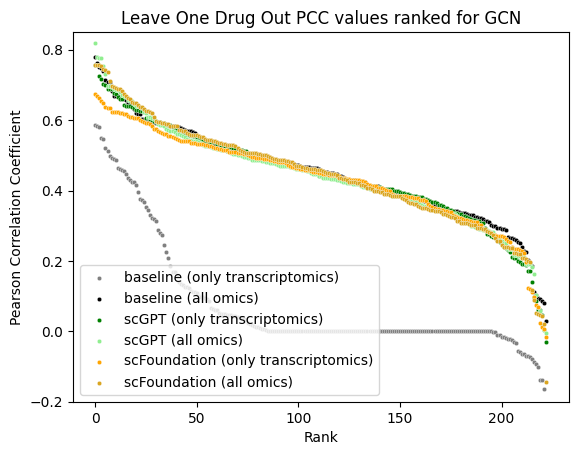

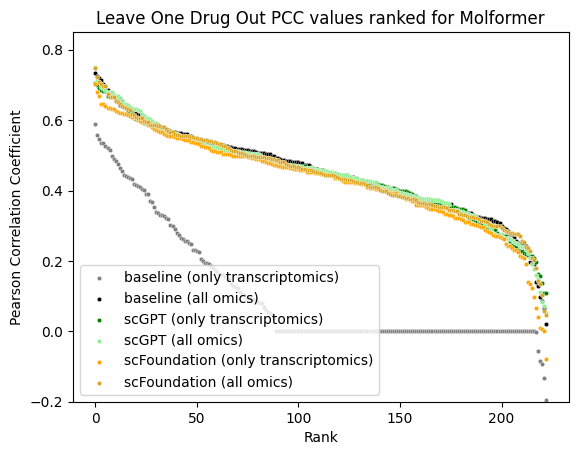

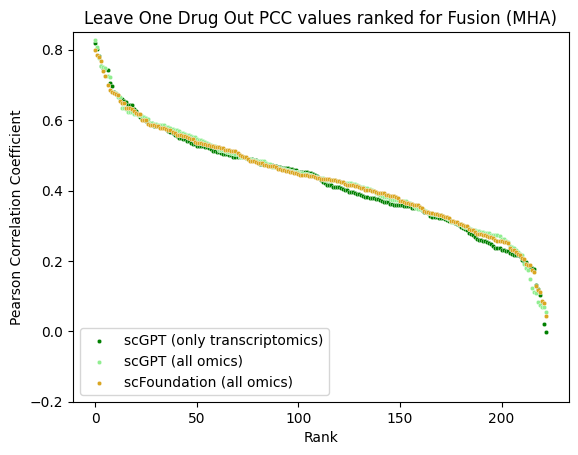

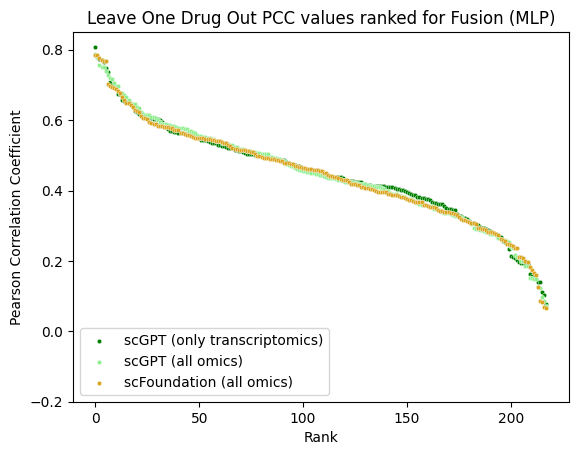

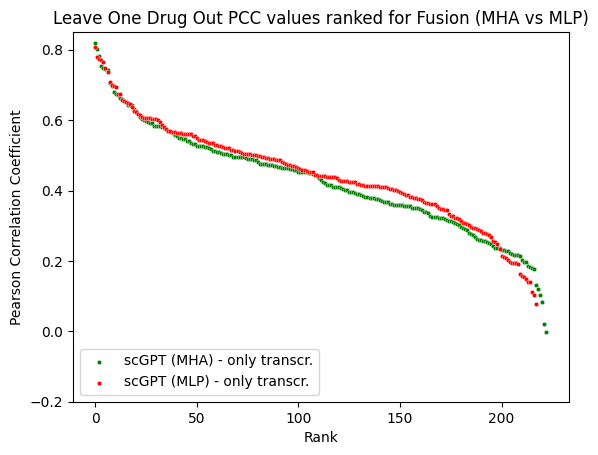

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
#figsize(4,4)

def plot_lodo_data(leaved2, title=None):
    plt.figure()
    plt.grid(False)
    # Sort values for better visualization
    leaved2.sort_values('base', ascending=False, inplace=True)
    
    # Plotting the data
    sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['base'], label="baseline (only transcriptomics)", color='grey', s=10, alpha=1)
    
    leaved2.sort_values('baselineWithOmics', ascending=False, inplace=True)
    sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['baselineWithOmics'], label="baseline (all omics)", color='black', s=10, alpha=1)
    
    leaved2.sort_values('scGPT', ascending=False, inplace=True)
    sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['scGPT'], label="scGPT (only transcriptomics)", color='green', s=10, alpha=1)
    
    leaved2.sort_values('scGPTWithOmics', ascending=False, inplace=True)
    sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['scGPTWithOmics'], label="scGPT (all omics)", color='lightgreen', s=10, alpha=1)
    
    leaved2.sort_values('scF', ascending=False, inplace=True)
    sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['scF'], label="scFoundation (only transcriptomics)", color='orange', s=10, alpha=1)
    
    leaved2.sort_values('scFoundWithOmics', ascending=False, inplace=True)
    sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['scFoundWithOmics'], label="scFoundation (all omics)", color='goldenrod', s=10, alpha=1)

    # Add labels for axes and title
    plt.xlabel('Rank')
    plt.ylabel('Pearson Correlation Coefficient')
    plt.title(title if title else 'Leave One Drug Out PCC values ranked')
    plt.ylim(-0.2, 0.85)
    plt.legend(loc="lower left")

def plot_lodo_data_fusion(leaved2, title=None):
    plt.figure()
    plt.grid(False)
    
    leaved2.sort_values('scGPT', ascending=False, inplace=True)
    sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['scGPT'], label="scGPT (only transcriptomics)", color='green', s=10, alpha=1)
    
    leaved2.sort_values('scGPTWithOmics', ascending=False, inplace=True)
    sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['scGPTWithOmics'], label="scGPT (all omics)", color='lightgreen', s=10, alpha=1)
    
    #leaved2.sort_values('scF', ascending=False, inplace=True)
    #sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['scF'], label="scFoundation (only transcriptomics)", color='orange', s=10, alpha=1)
    
    leaved2.sort_values('scFoundWithOmics', ascending=False, inplace=True)
    sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['scFoundWithOmics'], label="scFoundation (all omics)", color='goldenrod', s=10, alpha=1)

    # Add labels for axes and title
    plt.xlabel('Rank')
    plt.ylabel('Pearson Correlation Coefficient')
    plt.title(title if title else 'Leave One Drug Out PCC values ranked')
    plt.ylim(-0.2, 0.85)
    plt.legend(loc="lower left")
    
def plot_lodo_data_fusion_2(leaved2, leaved2_2, title=None):
    plt.figure()
    plt.grid(False)
    
    leaved2.sort_values('scGPT', ascending=False, inplace=True)
    sns.scatterplot(x=np.arange(leaved2.shape[0]), y=leaved2['scGPT'], label="scGPT (MHA) - only transcr.", color='green', s=10, alpha=1)
    
    leaved2_2.sort_values('scGPT', ascending=False, inplace=True)
    sns.scatterplot(x=np.arange(leaved2_2.shape[0]), y=leaved2_2['scGPT'], label="scGPT (MLP) - only transcr.", color='red', s=10, alpha=1)
    

    # Add labels for axes and title
    plt.xlabel('Rank')
    plt.ylabel('Pearson Correlation Coefficient')
    plt.title(title if title else 'Leave One Drug Out PCC values ranked')
    plt.ylim(-0.2, 0.85)
    plt.legend(loc="lower left")

plot_lodo_data(leave_drug_data_gcn, "Leave One Drug Out PCC values ranked for GCN")
plot_lodo_data(leave_drug_data_molformer, "Leave One Drug Out PCC values ranked for Molformer")
plot_lodo_data_fusion(leave_drug_data_fusion, "Leave One Drug Out PCC values ranked for Fusion (MHA)")
plot_lodo_data_fusion(leave_drug_data_fusion_mlp, "Leave One Drug Out PCC values ranked for Fusion (MLP)")
plot_lodo_data_fusion_2(leave_drug_data_fusion, leave_drug_data_fusion_mlp, "Leave One Drug Out PCC values ranked for Fusion (MHA vs MLP)")
#leaved2.sort_values('base',ascending=False,inplace=True)
#sns.scatterplot(x=np.arange(leaved2.shape[0]),y=leaved2['base'],label="baseline (only transcriptomics)",color='grey',s=5,alpha=1)

#leaved2.sort_values('baselineWithOmics',ascending=False,inplace=True)
#sns.scatterplot(x=np.arange(leaved2.shape[0]),y=leaved2['baselineWithOmics'],label="baseline (all omics)",color='black',s=5,alpha=1)

#leaved2.sort_values('scGPT',ascending=False,inplace=True)
#sns.scatterplot(x=np.arange(leaved2.shape[0]),y=leaved2['scGPT'],label="scGPT (only transcriptomics)",color='green',s=5,alpha=1)

#leaved2.sort_values('scGPTWithOmics',ascending=False,inplace=True)
#sns.scatterplot(x=np.arange(leaved2.shape[0]),y=leaved2['scGPTWithOmics'],label="scGPT (all omics)",color='lightgreen',s=5,alpha=1)

#leaved2.sort_values('scF',ascending=False,inplace=True)
#sns.scatterplot(x=np.arange(leaved2.shape[0]),y=leaved2['scF'],label="scFoundation (only transcriptomics)",color='orange',s=5, alpha=1)

#leaved2.sort_values('scFoundWithOmics',ascending=False,inplace=True)
#sns.scatterplot(x=np.arange(leaved2.shape[0]),y=leaved2['scFoundWithOmics'],label="scFoundation (all omics)",color='darkorange',s=5, alpha=1)

# Add labels for axes and title
#plt.xlabel('Rank')
#plt.ylabel('Pearson Correlation Coefficient')
#plt.title('Leave One Drug Out PCC values ranked')
#plt.ylim(-0.65,0.9)
#plt.legend(loc="lower left")

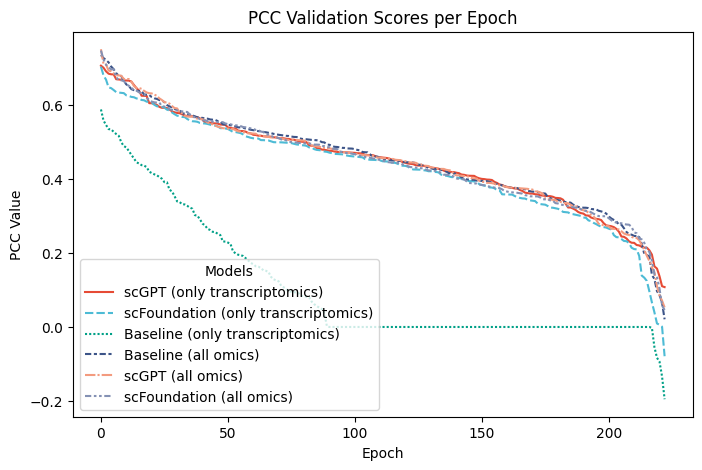

In [104]:
# lineplot
def lineplotLeaveDrug(scfoundation_vals, scgpt_vals, baseline_vals, baseline_with_vals, scgpt_with_vals, scF_with_vals, ylim=None):
    data = {
        'scGPT (only transcriptomics)': scgpt_vals,
        'scFoundation (only transcriptomics)': scfoundation_vals,
        'Baseline (only transcriptomics)': baseline_vals,
        'Baseline (all omics)': baseline_with_vals,
        'scGPT (all omics)': scgpt_with_vals,
        'scFoundation (all omics)': scF_with_vals,
    }

    # Pad shorter series with NaN to ensure equal length
    max_len = max(len(s) for s in data.values())
    for k in data:
        data[k] = pd.Series(data[k]).reset_index(drop=True).reindex(range(max_len))

    df = pd.DataFrame(data)

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df)
    plt.ylim(ylim)
    plt.title('PCC Validation Scores per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('PCC Value')
    plt.legend(title='Models')
    plt.show()

lineplotLeaveDrug(
    leave_drug_data_molformer['scF'].sort_values(ascending=False),
    leave_drug_data_molformer['scGPT'].sort_values(ascending=False),
    leave_drug_data_molformer['base'].sort_values(ascending=False),
    leave_drug_data_molformer['baselineWithOmics'].sort_values(ascending=False),
    leave_drug_data_molformer['scGPTWithOmics'].sort_values(ascending=False),
    leave_drug_data_molformer['scFoundWithOmics'].sort_values(ascending=False)
)

# First Conclusion
The usage of Foundation Models can counter data sparsity such as non-availability of multi omics cell data as it can obtain similar performance to the baseline model using that data. Further, scGPT seems to perform better on the task of filling these information gaps than scFoundation does.

# training stability

In [4]:
import pickle

def retrieveEpochData(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_run_1.pickle")

[0.8379201380019485,
 0.8696152544742878,
 0.8722224175281107,
 0.8795748329345484,
 0.8898993131634235,
 0.8953276643790387,
 0.9004817500561372,
 0.9024259661696457,
 0.9035335194160475,
 0.904901258482368,
 0.9032896113975305,
 0.9043377966850967,
 0.9085022641601845,
 0.9100965584071916,
 0.9103370809826253,
 0.9100207704803042,
 0.9115570522267293,
 0.9124572789830616,
 0.8852904505240783,
 0.909129864451766,
 0.9138778537235024,
 0.9148461359848798,
 0.9117503294210098,
 0.911107455368846,
 0.9142964924208372,
 0.9145979636851941,
 0.9158040032895179,
 0.9160899441555438,
 0.9151793984986665,
 0.9158866518716521,
 0.9173318072538408,
 0.9187702287746349,
 0.9180871705599737,
 0.9132925274915883,
 0.9180563544881974,
 0.9178394827843789,
 0.9182016324942235,
 0.9199009833657578,
 0.9178331788670111,
 0.9195689457800292,
 0.9186755920228924,
 0.9193645660667135,
 0.9191694224464851,
 0.919236911614242,
 0.9180719000795715,
 0.9197698630571621,
 0.9205872233651816,
 0.91991165937083

# Training Stability with all omics

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Run 1'}, xlabel='Epoch', ylabel='PCC Value'>,
        <Axes: title={'center': 'Run 2'}, xlabel='Epoch', ylabel='PCC Value'>,
        <Axes: title={'center': 'Run 3'}, xlabel='Epoch', ylabel='PCC Value'>],
       dtype=object))

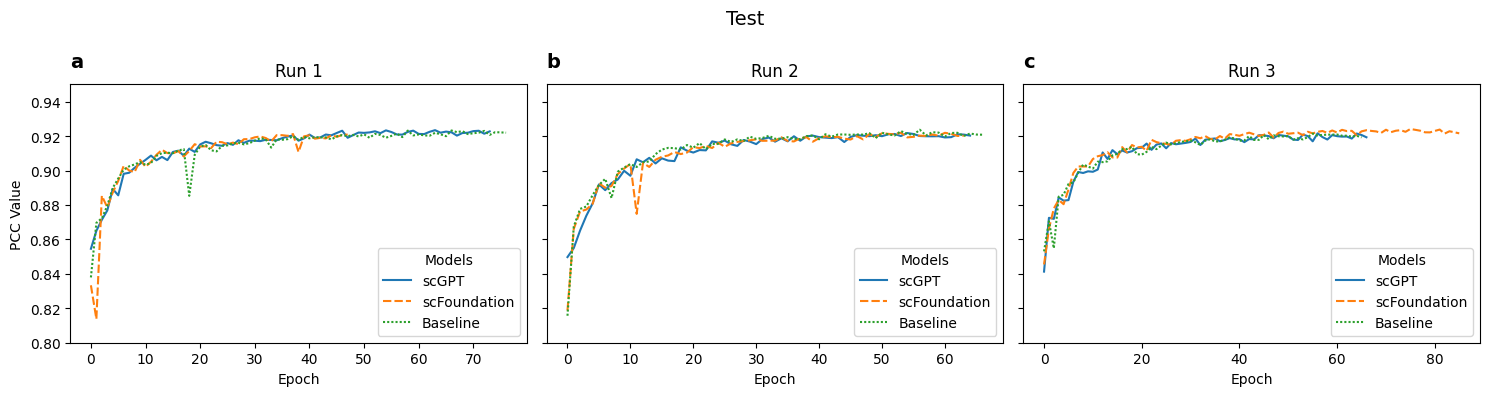

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_learning_curves(dfs, titles=None, figsize=(15, 4), sharey=True, description=""):
    """
    Zeichnet mehrere Learning-Curve-DataFrames nebeneinander.
    
    Args:
        dfs (list[pd.DataFrame]): Liste von DataFrames (jeder wird geplottet).
        titles (list[str], optional): Titel für die einzelnen Subplots.
        figsize (tuple, optional): Gesamtgröße der Figure.
        sharey (bool, optional): Gemeinsame y-Achse für alle Plots.
        description (str, optional): Gesamtüberschrift.
    """
    n = len(dfs)
    fig, axes = plt.subplots(1, n, figsize=figsize, sharey=sharey)

    if n == 1:  # wenn nur ein Plot
        axes = [axes]

    for i, (df, ax) in enumerate(zip(dfs, axes)):
        sns.lineplot(data=df, ax=ax)
        if titles:
            ax.set_title(titles[i])
        ax.set_xlabel("Epoch")
        ax.set_ylabel("PCC Value")
        ax.set_ylim(0.8, 0.95)
        ax.legend(title="Models")
        

    if description:
        fig.suptitle(description, fontsize=14)

    plt.tight_layout()
    return fig, axes

import string

def plot_learning_curves(dfs, titles=None, figsize=(15, 4), sharey=True, description=""):
    """
    Zeichnet mehrere Learning-Curve-DataFrames nebeneinander.
    """
    n = len(dfs)
    fig, axes = plt.subplots(1, n, figsize=figsize, sharey=sharey)

    if n == 1:  # wenn nur ein Plot
        axes = [axes]

    for i, (df, ax) in enumerate(zip(dfs, axes)):
        sns.lineplot(data=df, ax=ax)
        if titles:
            ax.set_title(titles[i])
        ax.set_xlabel("Epoch")
        ax.set_ylabel("PCC Value")
        ax.set_ylim(0.8, 0.95)
        ax.legend(title="Models")

        # Label hinzufügen (a), (b), (c), ...
        ax.text(0, 1.05, f"{string.ascii_lowercase[i]}", 
                transform=ax.transAxes, fontsize=14, fontweight="bold",
                va="bottom", ha="left")

    if description:
        fig.suptitle(description, fontsize=14)

    plt.tight_layout()
    return fig, axes


def toDataframe(scGPT, scFoundation, baseline):
    data = {
        'scGPT': scGPT,
        'scFoundation': scFoundation,
        'Baseline': baseline
    }
    
    # pad for differing lengths
    max_len = max(len(lst) for lst in data.values())
    for k, v in data.items():
        v.extend([np.nan] * (max_len - len(v)))

    df = pd.DataFrame(data)
    df_filtered = df.loc[:, ~df.isna().all()]
    return df_filtered

scfoundation_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_1.pickle")
scgpt_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_1.pickle")
baseline_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_run_1.pickle")
df1 = toDataframe(scgpt_pcc_val, scfoundation_pcc_val, baseline_pcc_val)

scfoundation_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_2.pickle")
scgpt_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_2.pickle")
baseline_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_run_2.pickle")
df2 = toDataframe(scgpt_pcc_val_2, scfoundation_pcc_val_2, baseline_pcc_val_2)
scfoundation_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_3.pickle")
scgpt_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_3.pickle")
baseline_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_256_256_256_bn_relu_GAP_run_3.pickle")
df3 = toDataframe(scgpt_pcc_val_3, scfoundation_pcc_val_3, baseline_pcc_val_3)

def evaluateLearningCurve(scfoundation_pcc_val, scgpt_pcc_val, baseline_pcc_val, ylim = None, description="", maxValue=None):

    data = {
        'scGPT': scgpt_pcc_val,
        'scFoundation': scfoundation_pcc_val,
        'Baseline': baseline_pcc_val
    }
    
    # pad for differing lengths
    max_len = max(len(lst) for lst in data.values())
    for k, v in data.items():
        v.extend([np.nan] * (max_len - len(v)))

    df = pd.DataFrame(data)
    df_filtered = df.loc[:, ~df.isna().all()]
    labels_with_max = [f"{col} (max={df_filtered[col].max():.3f})" for col in df_filtered.columns]
    scgptMax = df_filtered['scGPT'].max()
    scfMax = df_filtered['scFoundation'].max()
    #baselineMax = df_filtered['Baseline'].max()
    fig = plt.figure(figsize=(5, 3))
    ax = sns.lineplot(data=df_filtered)
    plt.ylim(ylim)
    plt.title(description)
    plt.xlabel('Epoch')
    plt.ylabel('PCC Value')
    plt.legend(title='Models')
    
        
    plt.show()
    return fig

description = "Drug Module: Baseline GCN, Cell Input: All Omics"

#gcn_all_1 = evaluateLearningCurve(scfoundation_pcc_val, scgpt_pcc_val, baseline_pcc_val, description=description, ylim=(0.8, 0.95))
#gcn_all_2 = evaluateLearningCurve(scfoundation_pcc_val_2, scgpt_pcc_val_2, baseline_pcc_val_2, description=description, ylim=(0.8, 0.95))
#gcn_all_3 = evaluateLearningCurve(scfoundation_pcc_val_3, scgpt_pcc_val_3, baseline_pcc_val_3, description=description, ylim=(0.8, 0.95))
plot_learning_curves([df1, df2, df3], titles=["Run 1", "Run 2", "Run 3"], description="Test", figsize=(15,4), sharey=True)

# Training Stability with just gene expression as cell representation

data for third run of scGPT is missing

stopping if no improvement for 10 epochs

[0.8229166713693692, 0.8604300782186414, 0.8639340485221153, 0.8208798680430696, 0.8871555915879169, 0.8849840612844093, 0.8875694528218386, 0.888348759554881, 0.8911286341583972, 0.8924920341469506, 0.8881614512016381, 0.8961794706332772, 0.8959247954611014, 0.9013480252764764, 0.8994395935616221, 0.8965263265582765, 0.9030081464910238, 0.9018861507714825, 0.8980949954956059, 0.9034274451814125, 0.9059073254642186, 0.9062792685405681, 0.9052013106530327, 0.9073676401698348, 0.9064449298971883, 0.9056097743421948, 0.906637648212034, 0.9073901902710696, 0.9091940303740363, 0.9097349808918381, 0.909511111107647, 0.9110686046539698, 0.9097565490390972, 0.9087184431591218, 0.9115412380743919, 0.9119251785154397, 0.9090145534680353, 0.9122803458047226, 0.9122836406619977, 0.9130336733403536, 0.9125955524852555, 0.9129628084077124, 0.9132567604701333, 0.9114049628676669, 0.9151081198690358, 0.9134050364235704, 0.9119032803049696, 0.91304566339031, 0.9131132884768145, 0.9152531665294622, 0.91

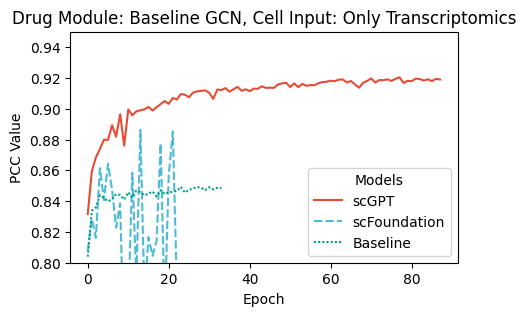

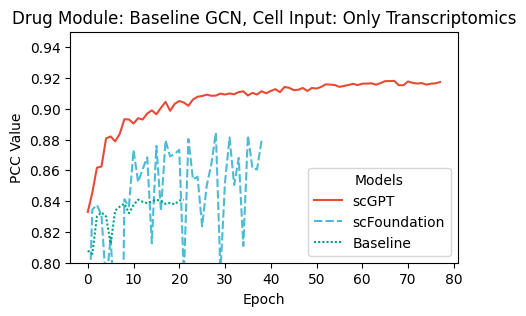

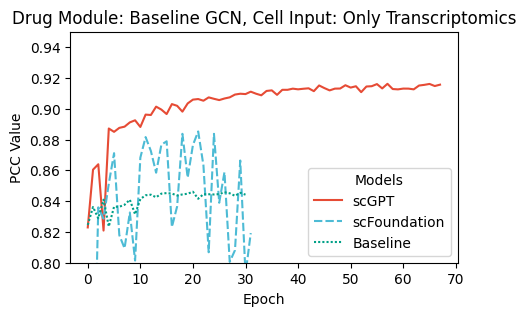

In [218]:
scfoundation_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_1.pickle")
scgpt_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_1.pickle")
baseline_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_run_1.pickle")

scfoundation_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_2.pickle")
scgpt_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_2.pickle")
baseline_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_run_2.pickle")

scfoundation_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scFound_embeddings_run_3.pickle")
scgpt_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_scGPT_embeddings_run_3.pickle")
baseline_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_256_256_256_bn_relu_GAP_run_3.pickle")

print(scgpt_pcc_val_3)
ylim = (0.8,0.95)
description = "Drug Module: Baseline GCN, Cell Input: Only Transcriptomics"
evaluateLearningCurve(scfoundation_pcc_val, scgpt_pcc_val, baseline_pcc_val, ylim=ylim, description=description)
evaluateLearningCurve(scfoundation_pcc_val_2, scgpt_pcc_val_2, baseline_pcc_val_2,ylim=ylim, description=description)
evaluateLearningCurve(scfoundation_pcc_val_3, scgpt_pcc_val_3, baseline_pcc_val_3,ylim=ylim, description=description)

# Training Stability using Chemberta (just genexpression as Cell representation)

data missing

[0.8181468880779958, 0.8407649749181612, 0.847952924958389, 0.8473326646425392, 0.8530952300238525, 0.8457983293895255, 0.8601102445196842, 0.839570489439598, 0.8523599211425905, 0.8560471377236575, 0.8578296660149117, 0.8622517295662722, 0.8482688427602623, 0.8647928139469555, 0.864233324033406, 0.8698660293273642, 0.8620803086423652, 0.8659392097859537, 0.8691019481938529, 0.8681229884194853, 0.8639586510140178, 0.8629179719627951, 0.866865207860384, 0.8680457105446152, 0.8753014891803211, 0.8745391829029202, 0.875405275195337, 0.8764416441634443, 0.8715649619758301, 0.8713798442000609, 0.866406658595167, 0.8739163646967889, 0.8660475887887409, 0.8783498847948467, 0.8737342811605404, 0.8733196631300733, 0.8797608854919088, 0.877025311538189, 0.8728828777550177, 0.8791869679171548, 0.8768595682712462, 0.8757977993022119, 0.877820574079428, 0.879166605313864, 0.8811480188332059, 0.8772847806101376, 0.8775571129348512, 0.8692195348692299, 0.8767626719566332, 0.8771608028559937, 0.875798

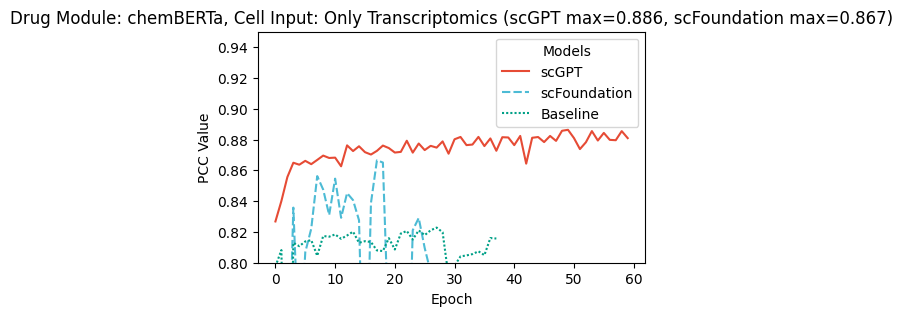

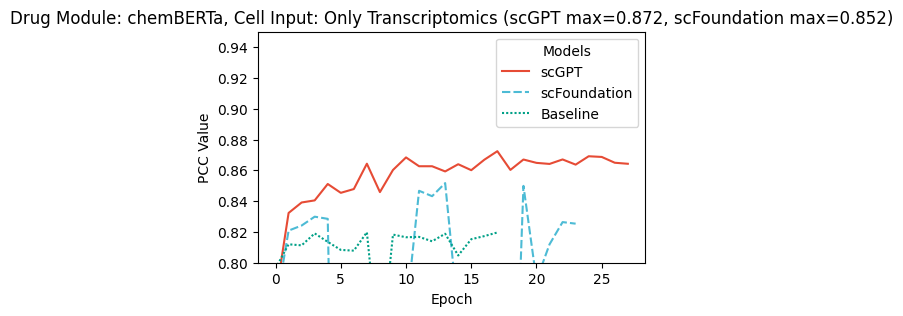

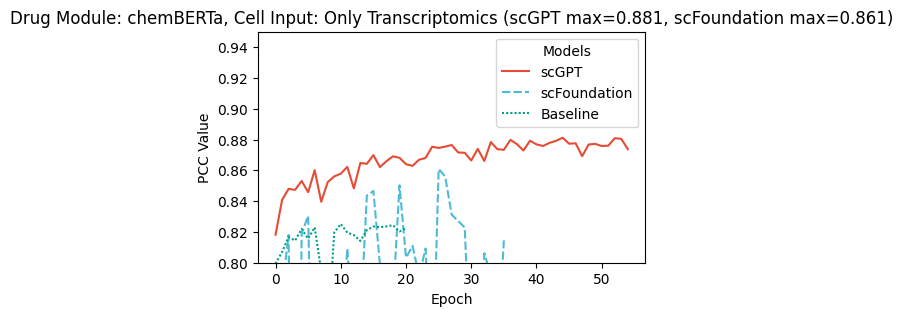

In [193]:
scfoundation_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scFound_embeddings_run_1.pickle")
scgpt_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scGPT_embeddings_run_1.pickle")
baseline_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_chemberta_run_1.pickle")

scfoundation_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scFound_embeddings_run_2.pickle")
scgpt_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scGPT_embeddings_run_2.pickle")
baseline_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_chemberta_run_2.pickle")

scfoundation_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scFound_embeddings_run_3.pickle")
scgpt_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_chemberta_scGPT_embeddings_run_3.pickle")
baseline_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_chemberta_run_3.pickle")

print(scgpt_pcc_val_3)
description = "Drug Module: chemBERTa, Cell Input: Only Transcriptomics"
evaluateLearningCurve(scfoundation_pcc_val, scgpt_pcc_val, baseline_pcc_val, description=description)
evaluateLearningCurve(scfoundation_pcc_val_2, scgpt_pcc_val_2, baseline_pcc_val_2, description=description)
evaluateLearningCurve(scfoundation_pcc_val_3, scgpt_pcc_val_3, baseline_pcc_val_3, description=description)

# Training Stability using Chemberta (with all omics)

[0.8265054471080335, 0.8435654746036046, 0.8568350119978502, 0.8592131482669845, 0.8707762516117495, 0.8673987717374161, 0.8712316981206021, 0.8691786805183248, 0.8631744184198652, 0.8717421628924246, 0.8730493629065194, 0.8728339566269934, 0.8713395107710938, 0.8726743082920342, 0.8782796446935814, 0.8732641850403714, 0.878380255535817, 0.8757601021955017, 0.8797277340654883, 0.8656299135823942, 0.8809382205375074, 0.8764917367100992, 0.8794825125270126, 0.8750214733092637, 0.880811750556254, 0.876953352061212, 0.8769427485462097, 0.8796906267289355, 0.882829870931146, 0.8824058837051364, 0.8800728922397897, 0.8788186914595258, 0.8797466534935011, 0.8775445724467383, 0.8826633307115851, 0.8827457722350698, 0.8774698376026213, 0.878396507463248, 0.8813105019208862]


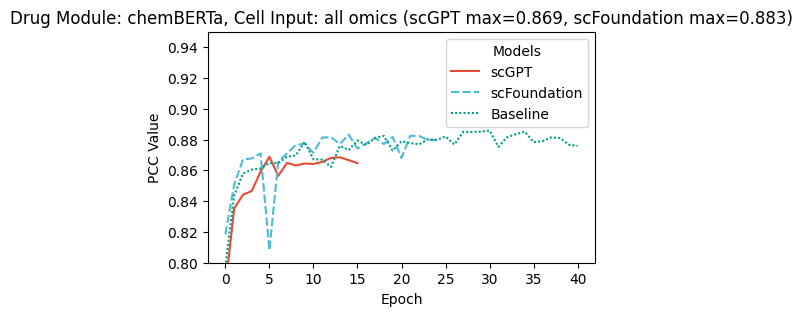

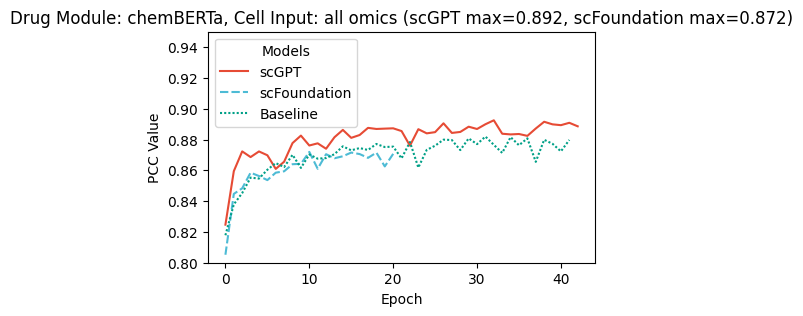

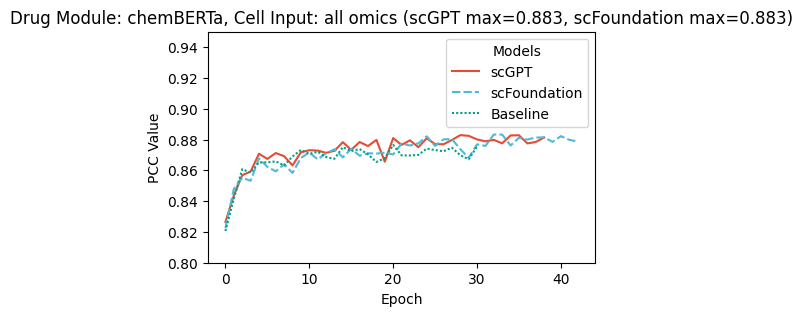

In [194]:
scfoundation_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scFound_embeddings_run_1.pickle")
scgpt_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scGPT_embeddings_run_1.pickle")
baseline_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_chemberta_run_1.pickle")

scfoundation_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scFound_embeddings_run_2.pickle")
scgpt_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scGPT_embeddings_run_2.pickle")
baseline_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_chemberta_run_2.pickle")

scfoundation_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scFound_embeddings_run_3.pickle")
scgpt_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_chemberta_scGPT_embeddings_run_3.pickle")
baseline_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_chemberta_run_3.pickle")

print(scgpt_pcc_val_3)
description = "Drug Module: chemBERTa, Cell Input: all omics"
evaluateLearningCurve(scfoundation_pcc_val, scgpt_pcc_val, baseline_pcc_val, description=description)
evaluateLearningCurve(scfoundation_pcc_val_2, scgpt_pcc_val_2, baseline_pcc_val_2, description=description)
evaluateLearningCurve(scfoundation_pcc_val_3, scgpt_pcc_val_3, baseline_pcc_val_3, description=description)

# Training Stability using Molformer



[0.874814919598961, 0.8824559213165579, 0.885504688866505, 0.8908132982155424, 0.8955862347180688, 0.8947847471412368, 0.8923380718731618, 0.897875609016039, 0.8941925554725346, 0.898324998391432, 0.9019438994980761, 0.9023734359330258, 0.9033029865502197, 0.9056081571426386, 0.9025010316083796, 0.9032419325276736, 0.9053196943312694, 0.9048043154751512, 0.907605114521832, 0.9066865203662189, 0.9075595860025825, 0.906525269782589, 0.9087280612011323, 0.9070707086734677, 0.9068069310188871, 0.9076390560335453, 0.9085328953866785, 0.9126899918166186, 0.9112389156439773, 0.9114648630289934, 0.9102783584913098, 0.9106704516209526, 0.9110608505921329, 0.912025825934518, 0.911930612730192, 0.91141560594601, 0.9125374750559412, 0.9122597725069214]


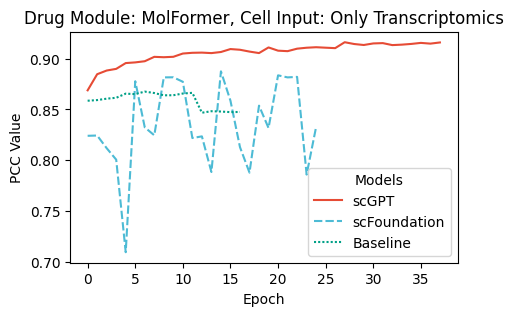

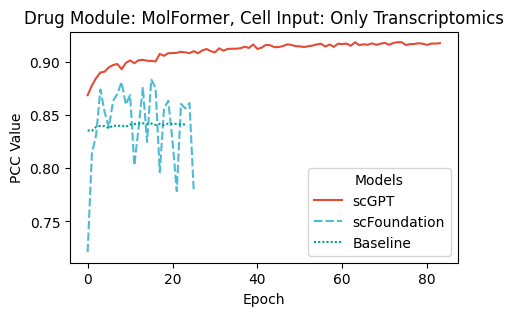

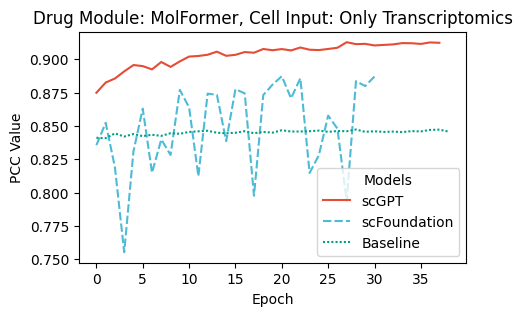

In [219]:
scfoundation_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_1.pickle")
scgpt_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_1.pickle")
baseline_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_1.pickle")

scfoundation_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_2.pickle")
scgpt_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_2.pickle")
baseline_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_2.pickle")

scfoundation_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_3.pickle")
scgpt_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_3.pickle")
baseline_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_3.pickle")

print(scgpt_pcc_val_3)

description = "Drug Module: MolFormer, Cell Input: Only Transcriptomics"
evaluateLearningCurve(scfoundation_pcc_val, scgpt_pcc_val, baseline_pcc_val, description=description)
evaluateLearningCurve(scfoundation_pcc_val_2, scgpt_pcc_val_2, baseline_pcc_val_2, description=description)
evaluateLearningCurve(scfoundation_pcc_val_3, scgpt_pcc_val_3, baseline_pcc_val_3, description=description)

# Training stability molformer (all omics)

[0.8813260111196383, 0.8929115917992088, 0.8990213702363167, 0.8979483587627536, 0.8988525549461646, 0.9059281860668598, 0.9098172726752506, 0.9096978041632112, 0.9086903816666458, 0.9113954008325522, 0.9128670015270427, 0.915883026472814, 0.9127598671787079, 0.9162266683471363, 0.914022280340961, 0.9157988617947235, 0.9175143031592827, 0.9174364087415748, 0.9188533296185591, 0.9204523941433169, 0.918452166600113, 0.9212942761889252, 0.9191783818600744, 0.920566888644948, 0.9213562633678944, 0.9196457302556715, 0.9182019416341793, 0.921236595512096, 0.9228799798951212, 0.9209285386286189, 0.920050247234041, 0.9218757304579895, 0.9209540619340586, 0.9225006030050402, 0.9224051822083636, 0.9231153421119764, 0.9228344811274871, 0.9242506729148354, 0.9220089509136862, 0.9219980909491508, 0.9226343810056061, 0.9248249703106484, 0.9229153674353318, 0.9238223835293904, 0.9226493204250161, 0.9221191886003899, 0.922380390712731, 0.9218086530373414, 0.9231962723299375, 0.9228735748861203, 0.9238

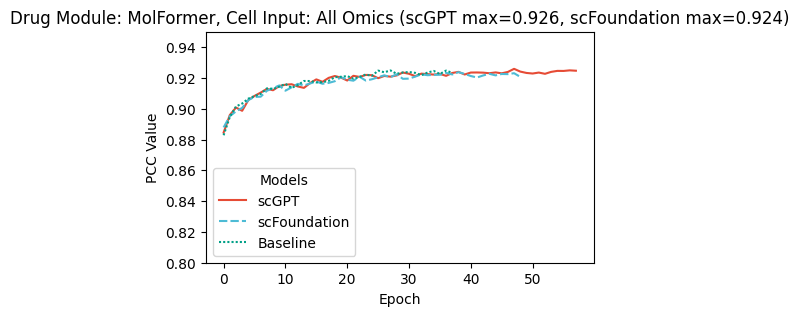

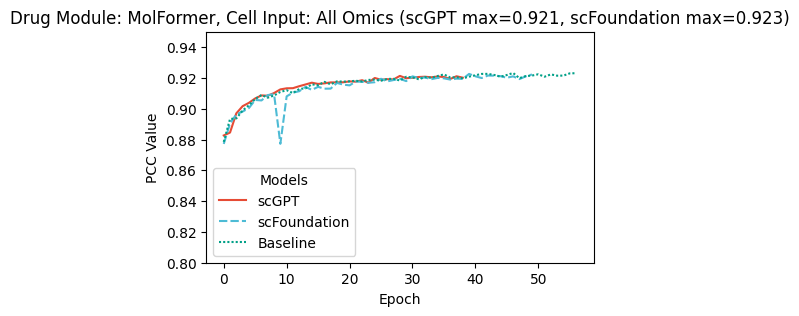

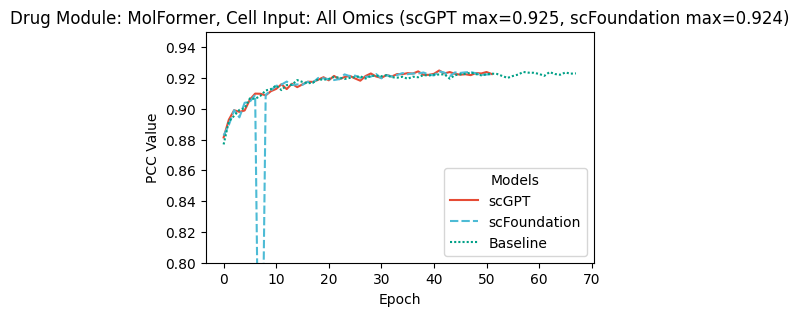

In [196]:
scfoundation_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_1.pickle")
scgpt_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_1.pickle")
baseline_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_1.pickle")

scfoundation_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_2.pickle")
scgpt_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_2.pickle")
baseline_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_2.pickle")

scfoundation_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_3.pickle")
scgpt_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_3.pickle")
baseline_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_3.pickle")

print(scgpt_pcc_val_3)
description = "Drug Module: MolFormer, Cell Input: All Omics"
evaluateLearningCurve(scfoundation_pcc_val, scgpt_pcc_val, baseline_pcc_val, description=description)
evaluateLearningCurve(scfoundation_pcc_val_2, scgpt_pcc_val_2, baseline_pcc_val_2, description=description)
evaluateLearningCurve(scfoundation_pcc_val_3, scgpt_pcc_val_3, baseline_pcc_val_3, description=description)

# Training stability Fusion

In [2]:
def evaluateLCRuns(base_path, fusion_type, input_type, suffix, description):
    

    scfoundation_pcc_val = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scFound_embeddings_{input_type}_run_1.{suffix}")
    scgpt_pcc_val = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scGPT_embeddings_{input_type}_run_1.{suffix}")
    #baseline_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_1.pickle")
    baseline_pcc_val = []
    scfoundation_pcc_val_2 = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scFound_embeddings_{input_type}_run_2.{suffix}")
    scgpt_pcc_val_2 = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scGPT_embeddings_{input_type}_run_2.{suffix}")
    baseline_pcc_val_2 = []
    #baseline_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_2.pickle")
    scfoundation_pcc_val_3 = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scFound_embeddings_{input_type}_run_3.{suffix}")
    scgpt_pcc_val_3 = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scGPT_embeddings_{input_type}_run_3.{suffix}")
    baseline_pcc_val_3 = [] 
    #baseline_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_3.pickle")
    
    evaluateLearningCurve(scfoundation_pcc_val, scgpt_pcc_val, baseline_pcc_val, description=description, ylim=(0.8,0.95))
    evaluateLearningCurve(scfoundation_pcc_val_2, scgpt_pcc_val_2, baseline_pcc_val_2, description=description,ylim=(0.8,0.95))
    evaluateLearningCurve(scfoundation_pcc_val_3, scgpt_pcc_val_3, baseline_pcc_val_3, description=description, ylim=(0.8,0.95))
    
def retrieveDFs_fusion(base_path, fusion_type, input_type, suffix):
    
    scfoundation_pcc_val = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scFound_embeddings_{input_type}_run_1.{suffix}")
    scgpt_pcc_val = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scGPT_embeddings_{input_type}_run_1.{suffix}")
    #baseline_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_1.pickle")
    baseline_pcc_val = []
    scfoundation_pcc_val_2 = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scFound_embeddings_{input_type}_run_2.{suffix}")
    scgpt_pcc_val_2 = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scGPT_embeddings_{input_type}_run_2.{suffix}")
    baseline_pcc_val_2 = []
    #baseline_pcc_val_2 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_2.pickle")
    scfoundation_pcc_val_3 = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scFound_embeddings_{input_type}_run_3.{suffix}")
    scgpt_pcc_val_3 = retrieveEpochData(f"{base_path}_fusion_{fusion_type}_molformer_scGPT_embeddings_{input_type}_run_3.{suffix}")
    baseline_pcc_val_3 = [] 
    #baseline_pcc_val_3 = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_3.pickle")
    df1 = toDataframe(scgpt_pcc_val, scfoundation_pcc_val, baseline_pcc_val)
    df2 = toDataframe(scgpt_pcc_val_2, scfoundation_pcc_val_2, baseline_pcc_val_2)
    df3 = toDataframe(scgpt_pcc_val_3, scfoundation_pcc_val_3, baseline_pcc_val_3)
    return df1, df2, df3

def retrieveDFs_fmi(input_type, drug_model, suffix="pickle"):
    dfs = []
    for run in [1,2,3]:
        scfoundation_pcc_val = retrieveEpochData(f"../data/eval/pcc_hist/DeepCDR_{input_type}_{drug_model}_scFound_embeddings_run_{run}.{suffix}")
        scgpt_pcc_val = retrieveEpochData(f"../data/eval/pcc_hist/DeepCDR_{input_type}_{drug_model}_scGPT_embeddings_run_{run}.{suffix}")
        baseline_pcc_val = retrieveEpochData(f"../data/eval/pcc_hist/DeepCDR_{input_type}_{drug_model}_run_{run}.{suffix}")
        dfs.append(toDataframe(scgpt_pcc_val, scfoundation_pcc_val, baseline_pcc_val))

    return dfs
    
def evaluateLCRun(fusion_type, input_type, number, description):
    

    scfoundation_pcc_val_fused = retrieveEpochData(f"../data/eval/pcc_fusion_hist/DeepCDR_fusion_{fusion_type}_molformer_scFound_embeddings_{input_type}_run_{number}.pkl")
    scgpt_pcc_val_fused = retrieveEpochData(f"../data/eval/pcc_fusion_hist/DeepCDR_fusion_{fusion_type}_molformer_scGPT_embeddings_{input_type}_run_{number}.pkl")
    #baseline_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_1.pickle")
    
    scfoundation_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_1.pickle")
    scgpt_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_1.pickle")
    baseline_pcc_val = retrieveEpochData("../data/eval/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_1.pickle")
    styles = {
        'FUSED (scGPT)': {'linestyle': '-', 'marker': 'o'},
        'FUSED(scFoundation)': {'linestyle': '-', 'marker': 's'},
        'scGPT': {'linestyle': '--', 'marker': 'D'},
        'scFoundation': {'linestyle': '--', 'marker': '^'},
        'Baseline': {'linestyle': ':', 'marker': None}
    }
    data = {
        'FUSED (scGPT)': scgpt_pcc_val_fused,
        'FUSED(scFoundation)': scfoundation_pcc_val_fused,
        'scGPT': scgpt_pcc_val,
        'scFoundation': scfoundation_pcc_val,
        'Baseline': baseline_pcc_val,
    }
    
    # pad for differing lengths
    max_len = max(len(lst) for lst in data.values())
    for k, v in data.items():
        v.extend([np.nan] * (max_len - len(v)))

    df = pd.DataFrame(data)
    df_filtered = df.loc[:, ~df.isna().all()]
    #baselineMax = df_filtered['Baseline'].max()
    fig = plt.figure(figsize=(5, 4))
    ax = sns.lineplot(data=df_filtered)
    plt.ylim(None)
    plt.title(description)
    plt.xlabel('Epoch')
    plt.ylabel('PCC Value')
    plt.legend(title='Models')
    
        
    plt.show()
    return fig




    

In [14]:
fusion_mha_trans = retrieveDFs_fusion("../data/eval/pcc_fusion_hist/fixed_lr/DeepCDR_LR_0.001", "fusion", "transcriptomics", "pickle")
molformer_trans = retrieveDFs_fmi("without_mut_with_gexp_without_methy", "molformer", "pickle")
molformer_all = retrieveDFs_fmi("with_mut_with_gexp_with_methy", "molformer", "pickle")

In [10]:
retrieveEpochData("../data/eval/pcc_fusion_hist/lr-exp/test/DeepCDR_LR_0.001_fusion_fusion_molformer_scFound_embeddings_transcriptomics_run_3.pickle")

[0.8797697,
 0.89016676,
 0.8910631,
 0.89189684,
 0.89245033,
 0.8911562,
 0.89623964,
 0.8966169,
 0.89690495,
 0.90083313,
 0.9037063,
 0.89853626,
 0.90311646,
 0.902511,
 0.904597,
 0.9057229,
 0.9063256,
 0.9078314,
 0.90850437,
 0.9075584,
 0.9097786,
 0.90935814,
 0.91139656,
 0.9119902,
 0.91265684,
 0.9147686,
 0.9151366,
 0.9138639,
 0.9146473,
 0.9127466,
 0.9145161,
 0.91614115,
 0.9163258,
 0.9176408,
 0.91777456,
 0.91906035,
 0.9186826,
 0.9170135,
 0.91928744,
 0.9161792,
 0.919423,
 0.92083716,
 0.9200826,
 0.92148364,
 0.92217875,
 0.9219073,
 0.9225997,
 0.92239654,
 0.9239082,
 0.9245472,
 0.9235754,
 0.9247141,
 0.92433035,
 0.92317706,
 0.9249334,
 0.92600024,
 0.925876,
 0.92603004,
 0.92652404,
 0.9266076,
 0.9257958,
 0.9276132,
 0.92621696,
 0.9252531,
 0.9259682,
 0.9262208,
 0.9248848,
 0.92587894,
 0.92555416,
 0.92510283,
 0.9265256,
 0.9264804,
 0.9270179,
 0.9264643,
 0.92717403,
 0.926878,
 0.92644334,
 0.9262023,
 0.92746526,
 0.92661613,
 0.9268081,


In [15]:
fusion_mha_trans[2]

scGPT  scFoundation
0   0.870821      0.872522
1   0.878339      0.880392
2   0.888649      0.886805
3   0.882357      0.883068
4   0.875826      0.863712
..       ...           ...
95  0.923665      0.904203
96  0.923215      0.903766
97  0.923823      0.902969
98  0.923309      0.903750
99  0.923165      0.903335

[100 rows x 2 columns]

(<Figure size 1500x400 with 2 Axes>,
 array([<Axes: xlabel='Epoch', ylabel='PCC Value'>,
        <Axes: xlabel='Epoch', ylabel='PCC Value'>], dtype=object))

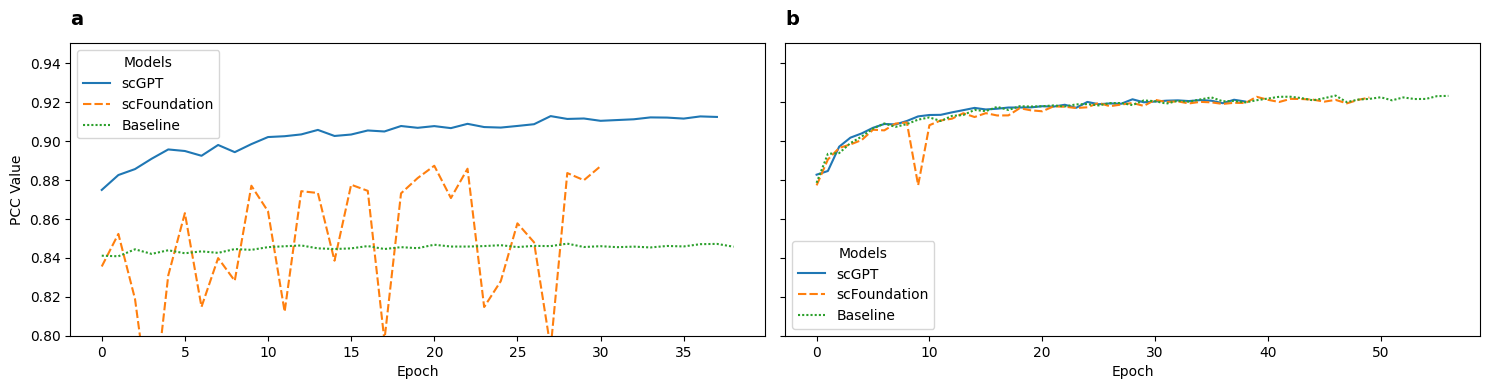

In [28]:
plot_learning_curves([molformer_trans[2],molformer_all[1]], titles=["", "", ""], description="", figsize=(15,4), sharey=True)

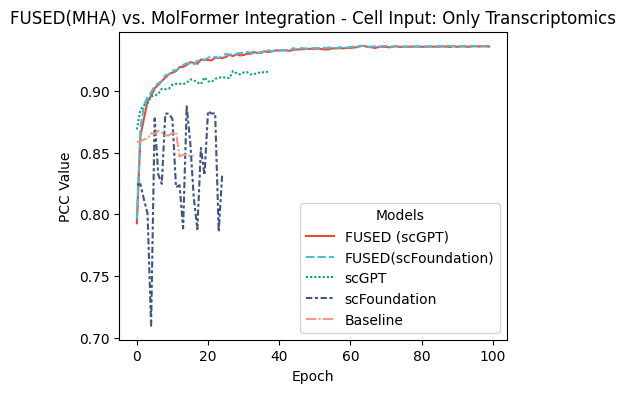

In [ ]:
fig1 = evaluateLCRun("cdr", "transcriptomics", 1, "FUSED(MHA) vs. MolFormer Integration - Cell Input: Only Transcriptomics")

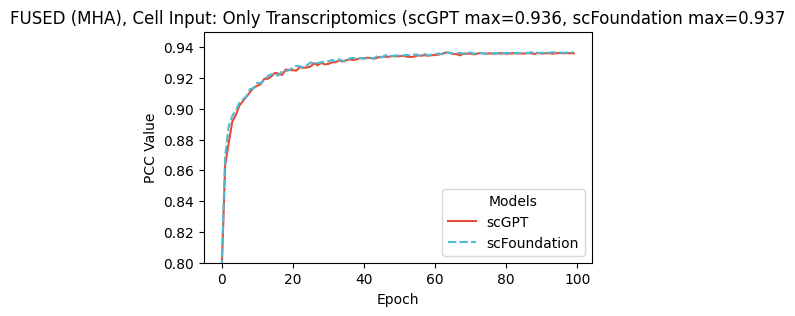

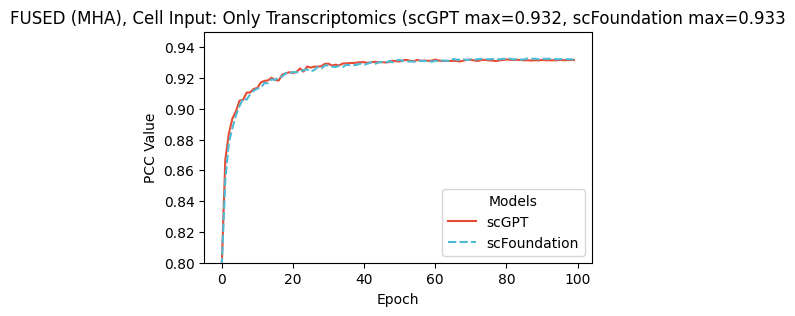

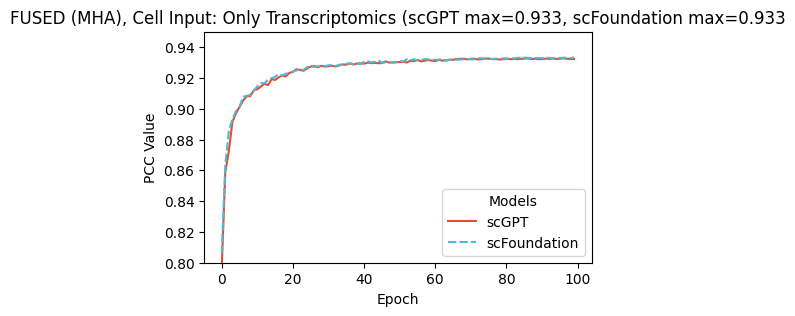

In [186]:
evaluateLCRuns("../data/eval/pcc_fusion_hist/DeepCDR", "cdr", "transcriptomics", "pkl", "FUSED (MHA), Cell Input: Only Transcriptomics")

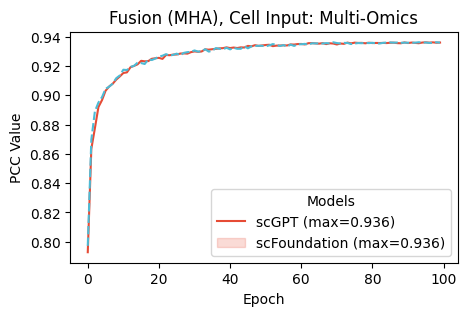

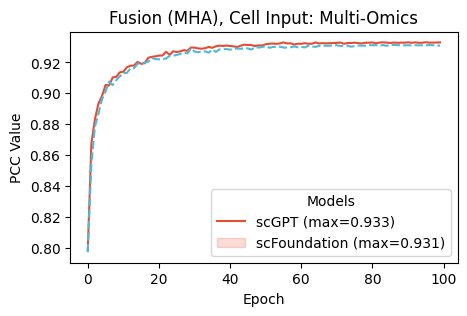

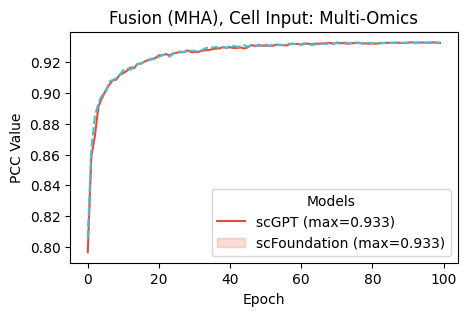

In [155]:
evaluateLCRuns("../data/eval/pcc_fusion_hist/DeepCDR", "cdr", "multi-omics", "Fusion (MHA), Cell Input: Multi-Omics")

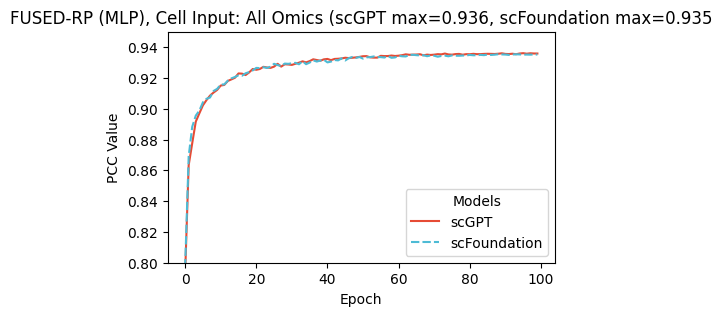

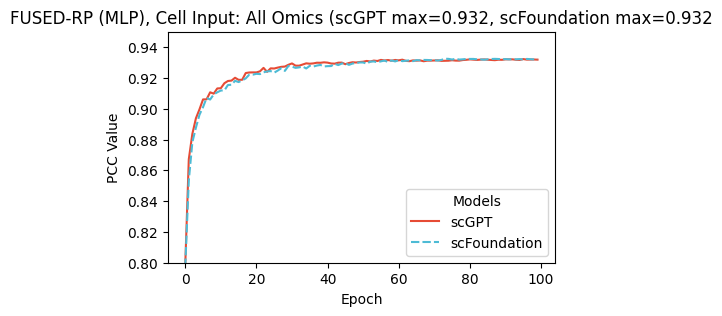

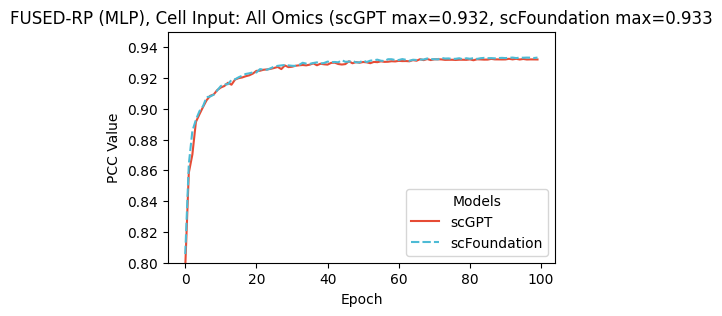

In [182]:
evaluateLCRuns("../data/eval/pcc_fusion_hist/DeepCDR","mlp", "multi-omics","pkl", "FUSED-RP (MLP), Cell Input: All Omics")

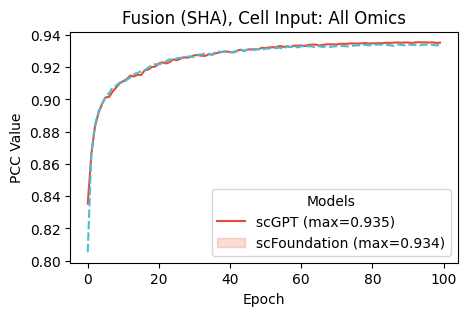

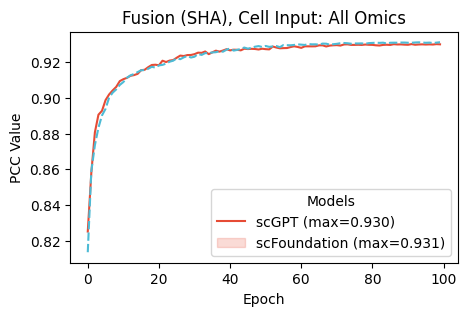

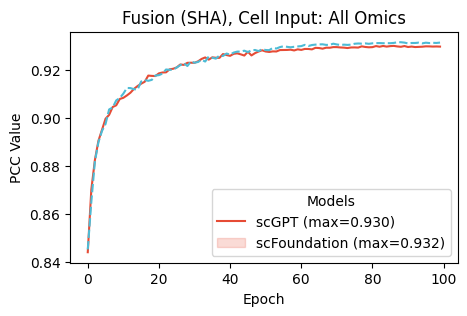

In [152]:
evaluateLCRuns("single", "multi-omics", "Fusion (SHA), Cell Input: All Omics")

# LR 0.001

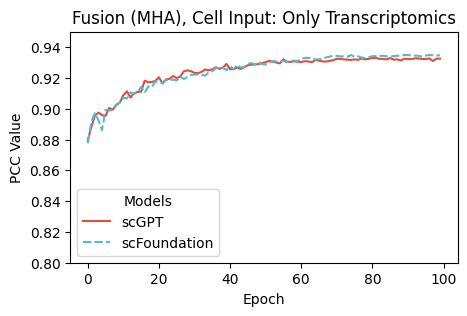

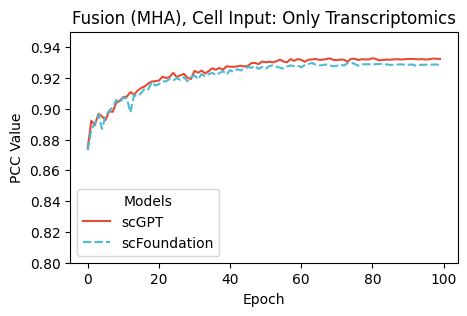

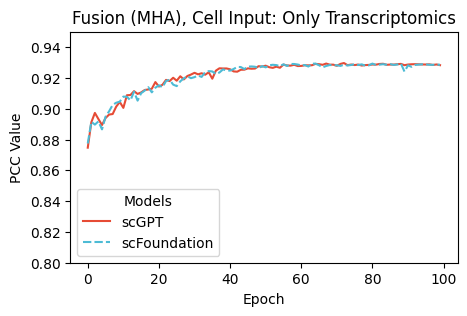

In [221]:
evaluateLCRuns("../data/eval/pcc_fusion_hist/lr-exp/DeepCDR_LR_0.001", "fusion", "transcriptomics", "pickle", "Fusion (MHA), Cell Input: Only Transcriptomics")

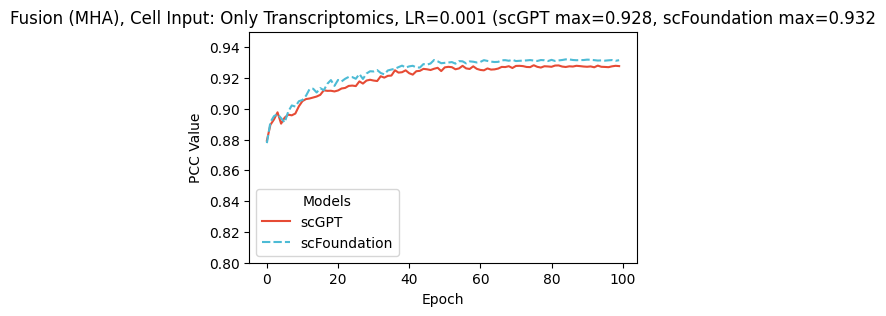

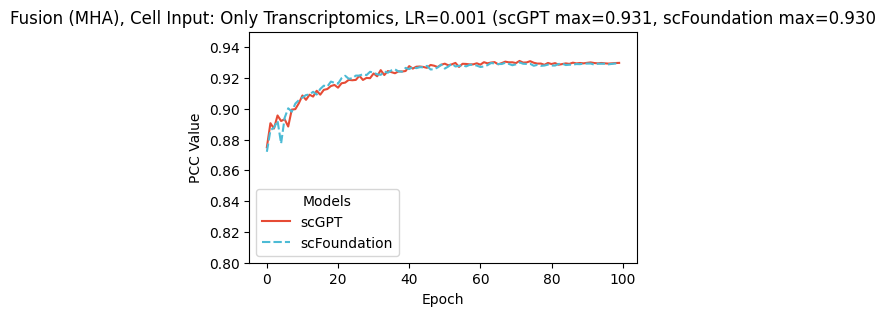

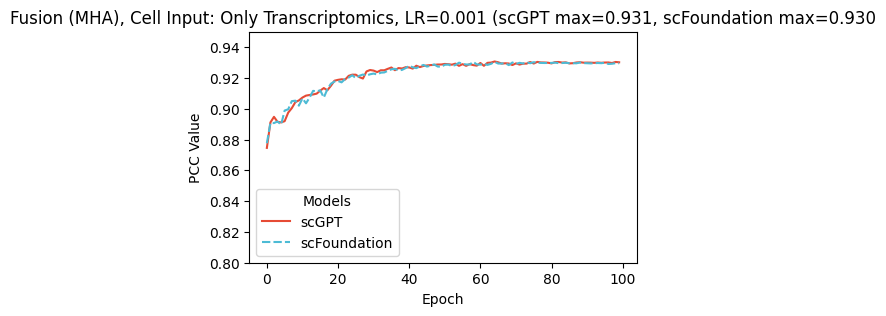

In [179]:
evaluateLCRuns("../data/eval/pcc_fusion_hist/lr-exp/DeepCDR_LR_0.001", "fusion", "multi-omics", "pickle", "Fusion (MHA), Cell Input: Only Transcriptomics, LR=0.001")

# no shuffle molformer

[0.8465741449846548, 0.849763352742867, 0.8426182660925686, 0.8348194991909215, 0.8231405175939184, 0.8357746067581807, 0.8445171600186367, 0.8294573650343876, 0.832293591980372, 0.8252096820318972, 0.8467765830501826, 0.8418364784645448]


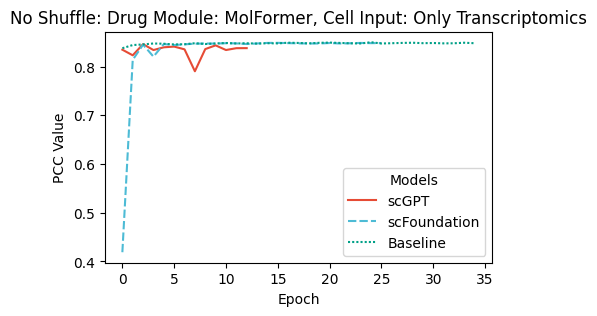

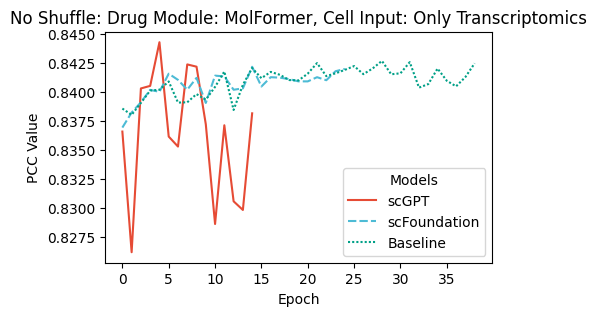

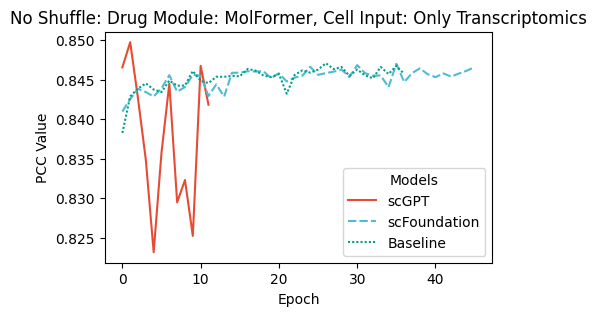

In [115]:
scfoundation_pcc_val = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_1.pickle")
scgpt_pcc_val = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_1.pickle")
baseline_pcc_val = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_1.pickle")

scfoundation_pcc_val_2 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_2.pickle")
scgpt_pcc_val_2 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_2.pickle")
baseline_pcc_val_2 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_2.pickle")

scfoundation_pcc_val_3 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_3.pickle")
scgpt_pcc_val_3 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_3.pickle")
baseline_pcc_val_3 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_3.pickle")

print(scgpt_pcc_val_3)

description = "No Shuffle: Drug Module: MolFormer, Cell Input: Only Transcriptomics"
evaluateLearningCurve(scfoundation_pcc_val, scgpt_pcc_val, baseline_pcc_val, description=description)
evaluateLearningCurve(scfoundation_pcc_val_2, scgpt_pcc_val_2, baseline_pcc_val_2, description=description)
evaluateLearningCurve(scfoundation_pcc_val_3, scgpt_pcc_val_3, baseline_pcc_val_3, description=description)

[0.8408165344796104, 0.8634419499959584, 0.8718500053087129, 0.8716509571322029, 0.8534999498567335, 0.87184474680406, 0.8788888981351372, 0.8758507074432571, 0.8772622307696101, 0.8797045535289933, 0.8900973921595599, 0.8845570571431216, 0.8790859279795192, 0.887923848161802, 0.876926567770729, 0.8720511198608961, 0.8785920600824563, 0.8825332860497351, 0.8797707650208147, 0.8774580347387059, 0.8786509078114729]


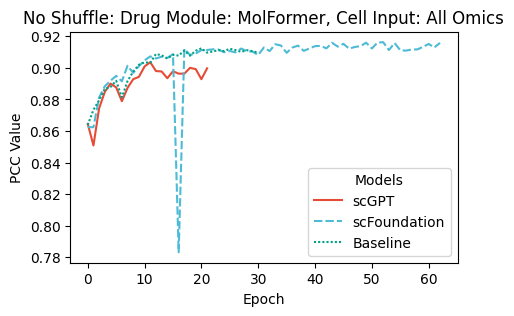

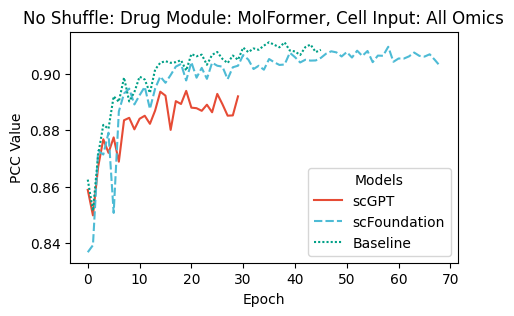

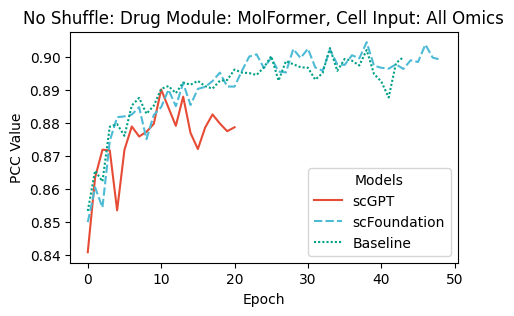

In [116]:
scfoundation_pcc_val = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_1.pickle")
scgpt_pcc_val = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_1.pickle")
baseline_pcc_val = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_1.pickle")

scfoundation_pcc_val_2 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_2.pickle")
scgpt_pcc_val_2 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_2.pickle")
baseline_pcc_val_2 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_2.pickle")

scfoundation_pcc_val_3 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_3.pickle")
scgpt_pcc_val_3 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_3.pickle")
baseline_pcc_val_3 = retrieveEpochData("../data/eval_no_shuffle/pcc_hist/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_3.pickle")

print(scgpt_pcc_val_3)
description = "No Shuffle: Drug Module: MolFormer, Cell Input: All Omics"
evaluateLearningCurve(scfoundation_pcc_val, scgpt_pcc_val, baseline_pcc_val, description=description)
evaluateLearningCurve(scfoundation_pcc_val_2, scgpt_pcc_val_2, baseline_pcc_val_2, description=description)
evaluateLearningCurve(scfoundation_pcc_val_3, scgpt_pcc_val_3, baseline_pcc_val_3, description=description)

{'baseline': {'pcc': 0.840602257149386, 'spearman': 0.7919241157535691}, 'scfoundation': {'pcc': 0.839006837406559, 'spearman': 0.7901899519923912}, 'scGPT': {'pcc': 0.8471553683700744, 'spearman': 0.8069534730290504}}
{'baseline': {'pcc': 0.8394772137244182, 'spearman': 0.7998752285616868}, 'scfoundation': {'pcc': 0.8385791485389819, 'spearman': 0.8002579526726856}, 'scGPT': {'pcc': 0.8494557147898207, 'spearman': 0.8136269329943131}}
{'baseline': {'pcc': 0.8459127373269814, 'spearman': 0.8048735516589259}, 'scfoundation': {'pcc': 0.8453979578308103, 'spearman': 0.8034591686460147}, 'scGPT': {'pcc': 0.8520870354752578, 'spearman': 0.8155280727344398}}
{'baseline': {'pcc': 0.9049329861101316, 'spearman': 0.8761677805552892}, 'scfoundation': {'pcc': 0.9123401538870762, 'spearman': 0.8860928803358898}, 'scGPT': {'pcc': 0.8959834372258845, 'spearman': 0.8629016215176832}}
{'baseline': {'pcc': 0.9064493761294783, 'spearman': 0.8782080886116409}, 'scfoundation': {'pcc': 0.9037565470166355, 

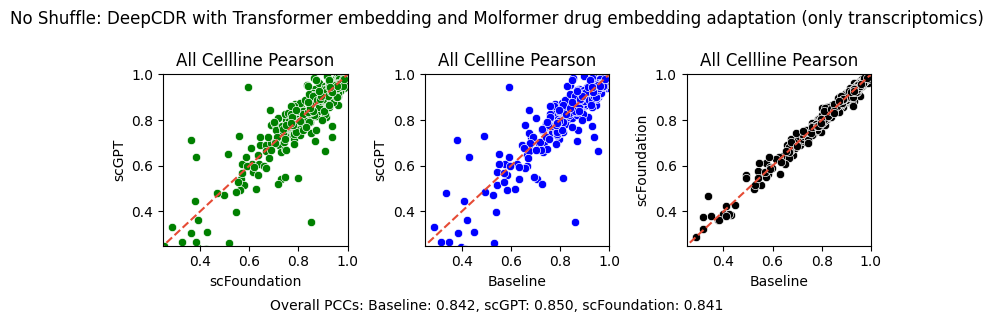

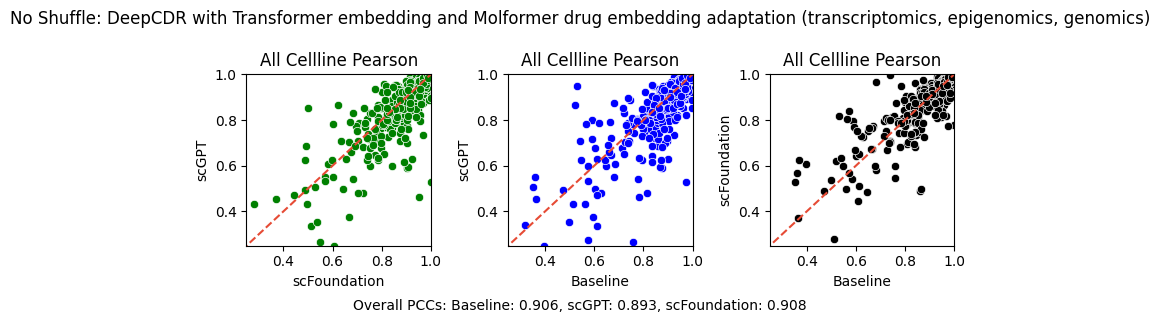

In [117]:
import numpy as np
import pandas as pd


deepCDR_molformer_baseline_1 = np.load("../data/eval_no_shuffle/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_1.npz")
deepCDR_molformer_baseline_2 = np.load("../data/eval_no_shuffle/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_2.npz")
deepCDR_molformer_baseline_3 = np.load("../data/eval_no_shuffle/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_run_3.npz")

deepCDR_molformer_scGPT_1 = np.load("../data/eval_no_shuffle/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_1.npz")
deepCDR_molformer_scGPT_2 = np.load("../data/eval_no_shuffle/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_2.npz")
deepCDR_molformer_scGPT_3 = np.load("../data/eval_no_shuffle/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scGPT_embeddings_run_3.npz")

deepCDR_molformer_scF_1 = np.load("../data/eval_no_shuffle/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_1.npz")
deepCDR_molformer_scF_2 = np.load("../data/eval_no_shuffle/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_2.npz")
deepCDR_molformer_scF_3 = np.load("../data/eval_no_shuffle/pcc/DeepCDR_without_mut_with_gexp_without_methy_molformer_scFound_embeddings_run_3.npz")

molformer_run_data_1 = aggRunDataFrame(deepCDR_molformer_baseline_1, deepCDR_molformer_scF_1, deepCDR_molformer_scGPT_1)
molformer_run_data_2 = aggRunDataFrame(deepCDR_molformer_baseline_2, deepCDR_molformer_scF_2, deepCDR_molformer_scGPT_2)
molformer_run_data_3 = aggRunDataFrame(deepCDR_molformer_baseline_3, deepCDR_molformer_scF_3, deepCDR_molformer_scGPT_3)
molformer_runs = [molformer_run_data_1,molformer_run_data_2,molformer_run_data_3]

molformer_eval_data = eval_runs(molformer_runs)

# with omics
deepCDR_molformer_baseline_1_with = np.load("../data/eval_no_shuffle/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_1.npz")
deepCDR_molformer_baseline_2_with = np.load("../data/eval_no_shuffle/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_2.npz")
deepCDR_molformer_baseline_3_with = np.load("../data/eval_no_shuffle/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_run_3.npz")

deepCDR_molformer_scGPT_1_with = np.load("../data/eval_no_shuffle/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_1.npz")
deepCDR_molformer_scGPT_2_with = np.load("../data/eval_no_shuffle/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_2.npz")
deepCDR_molformer_scGPT_3_with = np.load("../data/eval_no_shuffle/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scGPT_embeddings_run_3.npz")

deepCDR_molformer_scF_1_with = np.load("../data/eval_no_shuffle/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_1.npz")
deepCDR_molformer_scF_2_with = np.load("../data/eval_no_shuffle/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_2.npz")
deepCDR_molformer_scF_3_with = np.load("../data/eval_no_shuffle/pcc/DeepCDR_with_mut_with_gexp_with_methy_molformer_scFound_embeddings_run_3.npz")

molformer_run_data_1_with = aggRunDataFrame(deepCDR_molformer_baseline_1_with, deepCDR_molformer_scF_1_with, deepCDR_molformer_scGPT_1_with)
molformer_run_data_2_with = aggRunDataFrame(deepCDR_molformer_baseline_2_with, deepCDR_molformer_scF_2_with, deepCDR_molformer_scGPT_2_with)
molformer_run_data_3_with = aggRunDataFrame(deepCDR_molformer_baseline_3_with, deepCDR_molformer_scF_3_with, deepCDR_molformer_scGPT_3_with)
molformer_runs_with = [molformer_run_data_1_with,molformer_run_data_2_with,molformer_run_data_3_with]

molformer_eval_data_with = eval_runs(molformer_runs_with)

plotCellLineForRun(molformer_run_data_3, molformer_eval_data, "No Shuffle: DeepCDR with Transformer embedding and Molformer drug embedding adaptation (only transcriptomics)")
plotCellLineForRun(molformer_run_data_3_with, molformer_eval_data_with, "No Shuffle: DeepCDR with Transformer embedding and Molformer drug embedding adaptation (transcriptomics, epigenomics, genomics)")

# Interesting: ScF and Baseline in the transcriptomics only setup seem to match almost exactly? - Possible Method error?